In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# read diff file
with open("./dataframes/df_diff_centroids_withcomments_newdata.pkl", 'rb') as f:
    df_diff = pickle.load(f)

In [3]:
df_diff["avg_delta_comments"] = ((df_diff["diff_ytcomments_ytcontent"]/df_diff["diff_ytcomments_ttcontent"])+(df_diff["diff_ttcomments_ttcontent"]/df_diff["diff_ttcomments_ytcontent"]))/2
df_diff["delta_comments_yt"] = (df_diff["diff_ytcomments_ytcontent"]/df_diff["diff_ytcomments_ttcontent"])
df_diff["delta_comments_tt"] = (df_diff["diff_ttcomments_ttcontent"]/df_diff["diff_ttcomments_ytcontent"])

In [4]:
dict_type_creator = {}  # key: creator, value: type
dict_type_creator["unclimatechange"] = "institution"
dict_type_creator["nbcnews"] = "news"
dict_type_creator["bbcnews"] = "news"
dict_type_creator["climateadam"] = "science_communicator"
dict_type_creator["drgilbz"] = "science_communicator"
dict_type_creator["dwplaneta"] = "news"
dict_type_creator["extinctionrebellionxr"] = "activist"
dict_type_creator["greenpeace_international"] = "activist"
dict_type_creator["guardian"] = "news"
dict_type_creator["ourchangingclimate"] = "science_communicator"
dict_type_creator["ted"] = "science_communicator"
dict_type_creator["juststopoil"] = "activist"
dict_type_creator["minuteearth"] = "science_communicator"
dict_type_creator["metoffices"] = "institution"
dict_type_creator["zahrabiabani"] = "science_communicator"
dict_type_creator["rupertread"] = "activist"
dict_type_creator["friendsoftheearth"] = "activist"
dict_type_creator["parleychannel"] = "activist"
dict_type_creator["actionfortheclimate"] = "activist"
dict_type_creator["piqueaction"] = "science_communicator"
dict_type_creator["margreen"] = "science_communicator"
dict_type_creator["nowthisearth"] = "news"


## Plot difference in content TT-YT vs. TT comments closeness to content

Correlation between diff_content and diff_ttcomments_ttcontent:  -0.5696587513585407
pvalue:  0.0070235813010624286


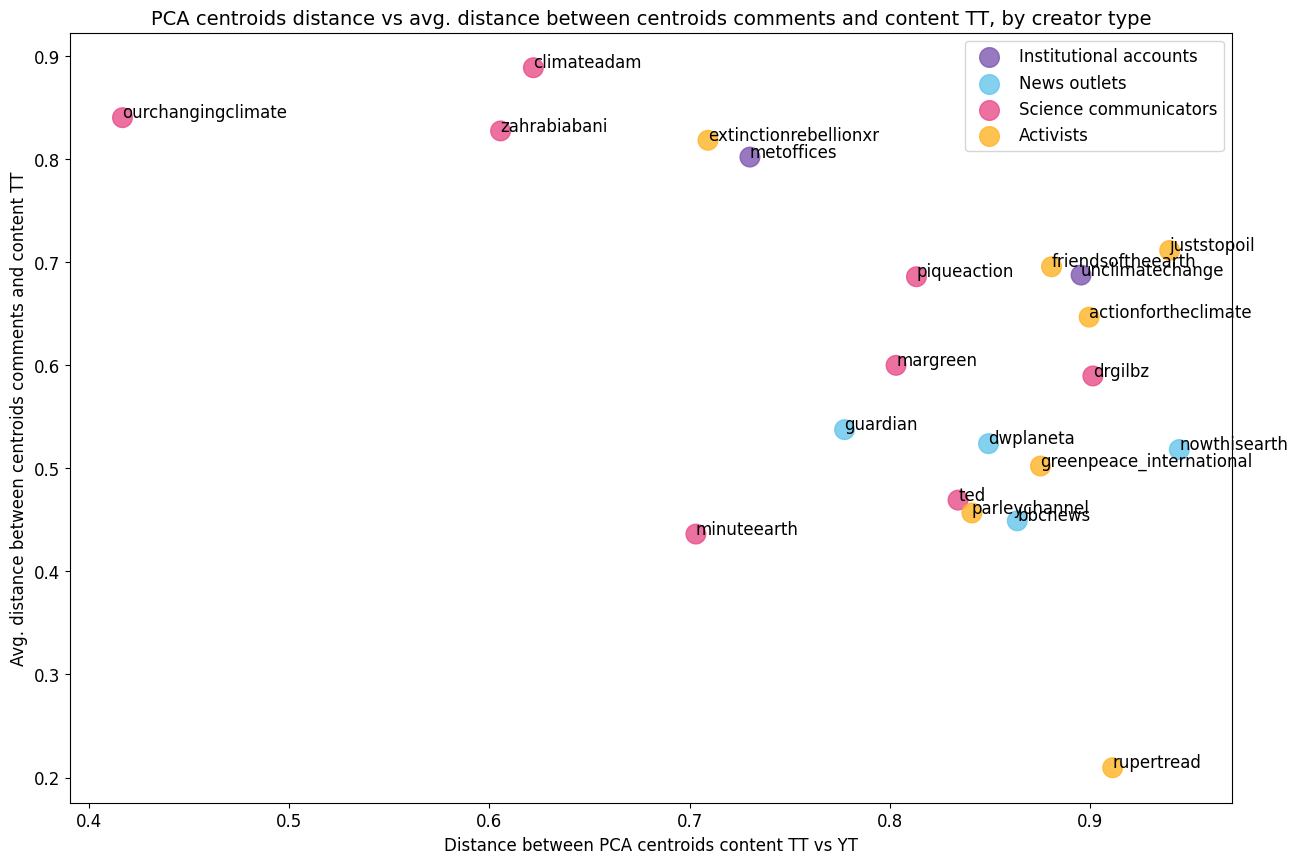

In [5]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(15,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# scatter plot with color coding based on creator type from dict_type_creator
plt.scatter(df_diff["cossim_content_orig"], df_diff["cossim_ttcontent_ttcomments_orig"], c=[list_colors[list_types.index(dict_type_creator[creator])] for creator in df_diff["creator"]], s=200, alpha=0.8)
plt.xlabel("Distance between PCA centroids content TT vs YT", fontsize=12)
plt.ylabel("Avg. distance between centroids comments and content TT", fontsize=12)
plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by creator type", fontsize=14)
# annotate points with creator names
for i, txt in enumerate(df_diff["creator"]):
    plt.annotate(txt, (df_diff["cossim_content_orig"][i], df_diff["cossim_ttcontent_ttcomments_orig"][i]), fontsize=12)

# also compute correlation between diff_content and diff_ttcomments_ttcontent and pvalue
from scipy.stats import pearsonr
# remove nan values
df_diff_nonull = df_diff.dropna(subset=["cossim_content_orig", "cossim_ttcontent_ttcomments_orig"])
corr, pvalue = pearsonr(df_diff_nonull["cossim_content_orig"], df_diff_nonull["cossim_ttcontent_ttcomments_orig"])
print("Correlation between diff_content and diff_ttcomments_ttcontent: ", corr)
print("pvalue: ", pvalue)

# change x and y ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)

plt.legend(loc="best", fontsize=12)
plt.show()

In [170]:
df_diff["type"] = [dict_type_creator[creator] for creator in df_diff["creator"]]

<Figure size 1500x1000 with 0 Axes>

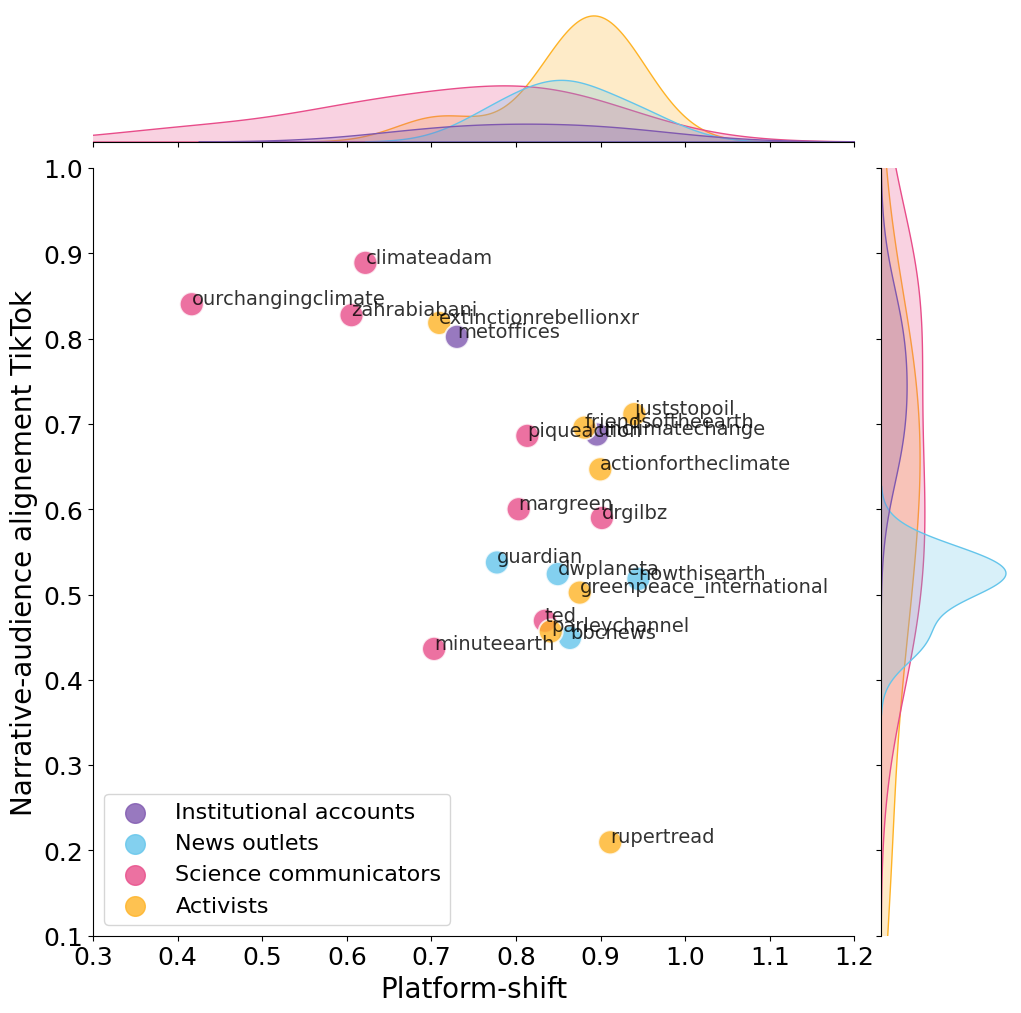

In [147]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(15,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# jointplot with color coding based on creator type from dict_type_creator, no kde distribution
sns.jointplot(x="cossim_content_orig", y="cossim_ttcontent_ttcomments_orig", data=df_diff, hue="type", kind="scatter", palette=list_colors, height=10, alpha=0.8, s=300, legend=False, markers="o")

# scatter plot with color coding based on creator type from dict_type_creator
#plt.scatter(df_diff["diff_content"], df_diff["diff_ttcomments_ttcontent"], c=[list_colors[list_types.index(dict_type_creator[creator])] for creator in df_diff["creator"]], s=200, alpha=0.8)
plt.xlabel("Platform-shift", fontsize=20)
plt.ylabel("Creator-audience alignement TikTok", fontsize=20)
#plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by creator type", fontsize=14)
# annotate points with creator names
for i, txt in enumerate(df_diff["creator"]):
    plt.annotate(txt, (df_diff["cossim_content_orig"][i], df_diff["cossim_ttcontent_ttcomments_orig"][i]), fontsize=14, alpha=0.8)

avg_types = {}
for type_creator in list_types:
    avg_types[type_creator] = [np.mean(df_diff[df_diff["type"]==type_creator]["cossim_ttcontent_ttcomments_orig"]), np.mean(df_diff[df_diff["type"]==type_creator]["cossim_content_orig"])]

# # plot avg_types
# for type_creator in list_types:
#     plt.scatter(avg_types[type_creator][1], avg_types[type_creator][0], color=list_colors[list_types.index(type_creator)], s=200, alpha=1, marker="*")
#     #plt.annotate(list_names_types[list_types.index(type_creator)], (avg_types[type_creator][1], avg_types[type_creator][0]), fontsize=12)

# change x and y ticks size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# start x and y axis at 0
plt.xlim(0.3, 1.2)
plt.ylim(0.1, 1)

# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)
#plt.scatter([], [], color="black", s=200, marker="*", label="Avg. per creator type", alpha=0.4)

plt.legend(loc="lower left", fontsize=16)
plt.show()

In [148]:

def marginal_boxplot(a, vertical=False, **kws):
    g = sns.boxplot(x='cossim_content_orig', y='cossim_ttcontent_ttcomments_orig', orient='v', **kws) if vertical else sns.boxplot(x='cossim_content_orig', y='cossim_ttcontent_ttcomments_orig', orient='h', **kws)
    g.set_ylabel('')
    g.set_xlabel('')

In [160]:
plt.rcParams["font.family"] = "sans-serif"

<Figure size 1500x1000 with 0 Axes>

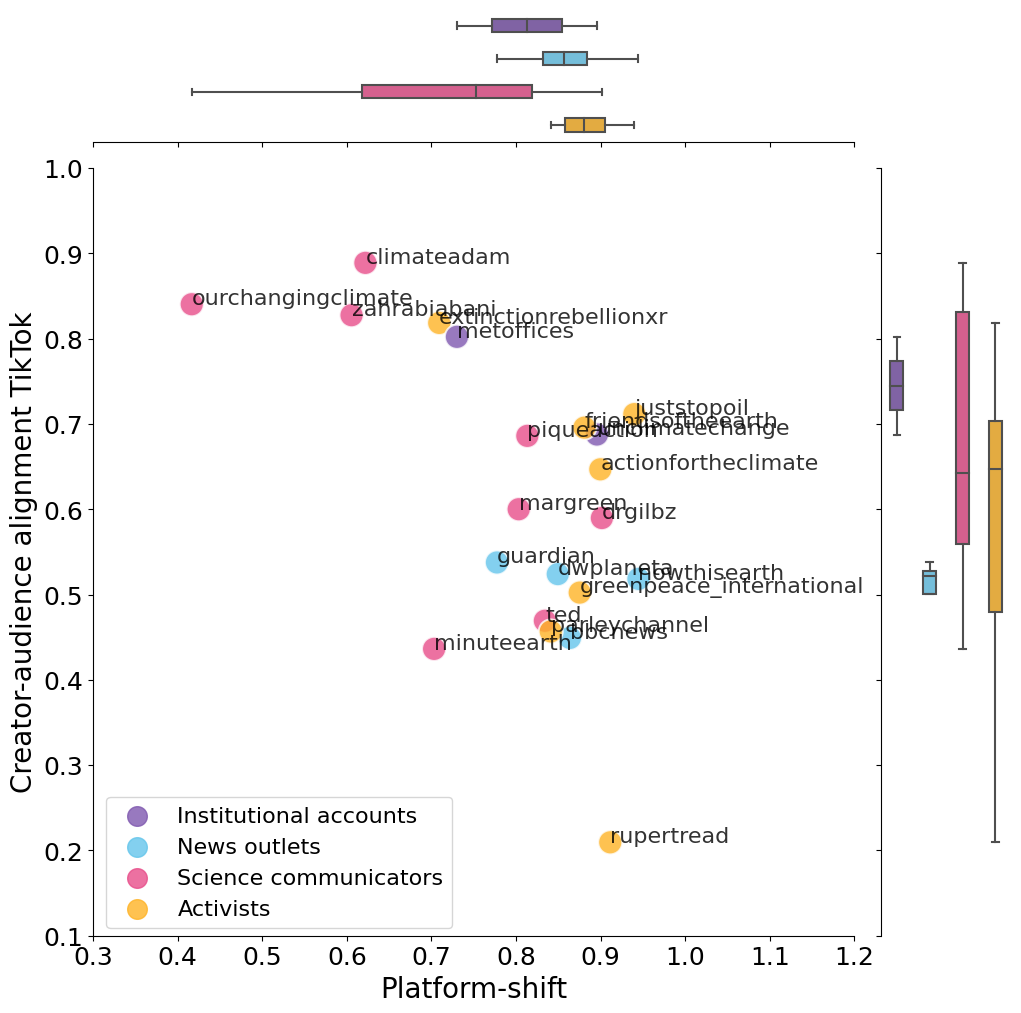

In [171]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(15,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]


# jointplot with color coding based on creator type from dict_type_creator, no kde distribution
g = sns.JointGrid(data=df_diff, x="cossim_content_orig", y="cossim_ttcontent_ttcomments_orig", hue="type", palette=list_colors, height=10)
sns.boxplot(df_diff, y=g.hue, x=g.x, ax=g.ax_marg_x, palette=list_colors, width=0.4, showfliers=False)


# # independent boxplot on the y axis, now it is cut off and not of the right width
sns.boxplot(df_diff, x=g.hue, y=g.y, palette=list_colors, width=0.4, ax=g.ax_marg_y, showfliers=False)
# remove axis of the boxplot

# leave some space between the boxplot and the scatterplot
g.ax_marg_x.set_xlim(0.3, 1.2)
g.ax_marg_y.set_ylim(0.1, 1)


g.plot_joint(sns.scatterplot, s=300, alpha=0.8, legend=False, markers="o")
# boxplot on the y axis, now it is cut off and not of the right width
#sns.boxplot(df_diff, x=g.hue, y=g.y, ax=g.ax_marg_y, palette=list_colors, width=0.5)

#sns.jointplot(x="cossim_content_orig", y="cossim_ttcontent_ttcomments_orig", data=df_diff, hue="type", kind="scatter", palette=list_colors, height=10, alpha=0.8, s=300, legend=False, markers="o")

# scatter plot with color coding based on creator type from dict_type_creator
#plt.scatter(df_diff["diff_content"], df_diff["diff_ttcomments_ttcontent"], c=[list_colors[list_types.index(dict_type_creator[creator])] for creator in df_diff["creator"]], s=200, alpha=0.8)
# JointGrid has a convenience function
g.set_axis_labels('x', 'y', fontsize=20)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Platform-shift')
g.ax_joint.set_ylabel('Creator-audience alignment TikTok')

#plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by creator type", fontsize=14)
# annotate points with creator names
for i, txt in enumerate(df_diff["creator"]):
    # annotate the scatterplot points
    g.ax_joint.annotate(txt, (df_diff["cossim_content_orig"][i], df_diff["cossim_ttcontent_ttcomments_orig"][i]), fontsize=16, alpha=0.8)

avg_types = {}
for type_creator in list_types:
    avg_types[type_creator] = [np.mean(df_diff[df_diff["type"]==type_creator]["cossim_ttcontent_ttcomments_orig"]), np.mean(df_diff[df_diff["type"]==type_creator]["cossim_content_orig"])]

# # plot avg_types
# for type_creator in list_types:
#     plt.scatter(avg_types[type_creator][1], avg_types[type_creator][0], color=list_colors[list_types.index(type_creator)], s=200, alpha=1, marker="*")
#     #plt.annotate(list_names_types[list_types.index(type_creator)], (avg_types[type_creator][1], avg_types[type_creator][0]), fontsize=12)

# change x and y ticks size
g.ax_joint.tick_params(axis='both', which='both', labelsize=18)



# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)
#plt.scatter([], [], color="black", s=200, marker="*", label="Avg. per creator type", alpha=0.4)

# choose legend location manually
plt.legend(fontsize=16, loc=(-5.9,0.01))

# save as svg
plt.savefig("./platformshift_creatoraudience.svg", format="svg")

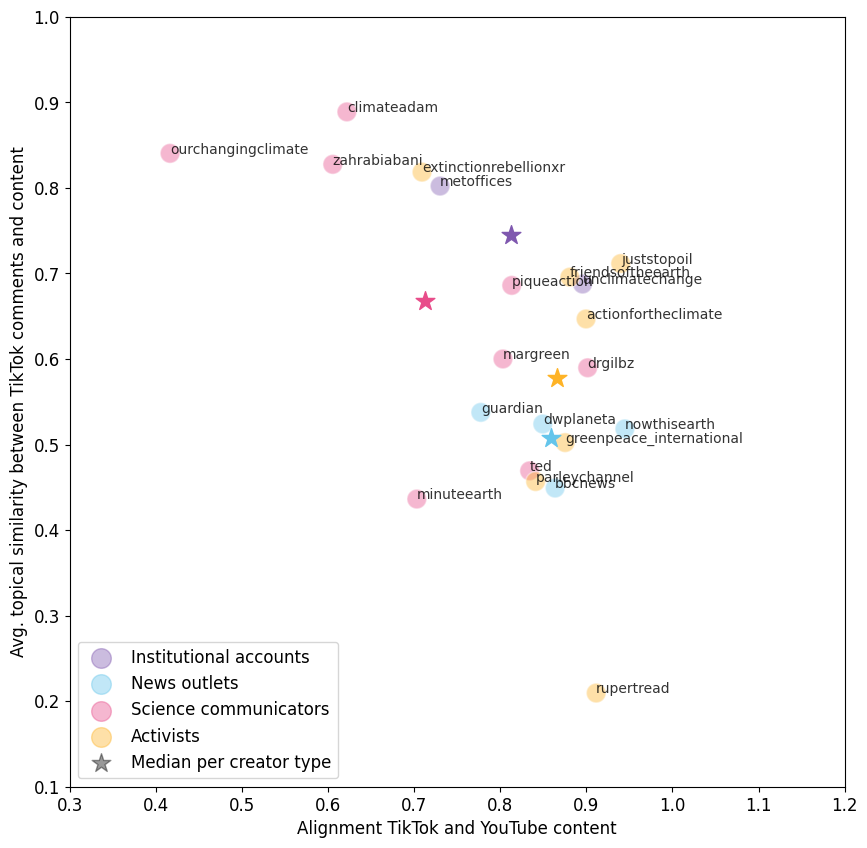

In [21]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(10,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# jointplot with color coding based on creator type from dict_type_creator, no kde distribution
sns.scatterplot(x="cossim_content_orig", y="cossim_ttcontent_ttcomments_orig", data=df_diff, hue="type", palette=list_colors,alpha=0.4, s=200, legend=False, markers="o")

# scatter plot with color coding based on creator type from dict_type_creator
#plt.scatter(df_diff["diff_content"], df_diff["diff_ttcomments_ttcontent"], c=[list_colors[list_types.index(dict_type_creator[creator])] for creator in df_diff["creator"]], s=200, alpha=0.8)
plt.xlabel("Alignment TikTok and YouTube content", fontsize=12)
plt.ylabel("Avg. topical similarity between TikTok comments and content", fontsize=12)
#plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by creator type", fontsize=14)
# annotate points with creator names
for i, txt in enumerate(df_diff["creator"]):
    plt.annotate(txt, (df_diff["cossim_content_orig"][i], df_diff["cossim_ttcontent_ttcomments_orig"][i]), fontsize=10, alpha=0.8)

avg_types = {}
for type_creator in list_types:
    avg_types[type_creator] = [np.mean(df_diff[df_diff["type"]==type_creator]["cossim_ttcontent_ttcomments_orig"]), np.mean(df_diff[df_diff["type"]==type_creator]["cossim_content_orig"])]

# plot avg_types
for type_creator in list_types:
    plt.scatter(avg_types[type_creator][1], avg_types[type_creator][0], color=list_colors[list_types.index(type_creator)], s=200, alpha=1, marker="*")
    #plt.annotate(list_names_types[list_types.index(type_creator)], (avg_types[type_creator][1], avg_types[type_creator][0]), fontsize=12)

# change x and y ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# start x and y axis at 0
plt.xlim(0.3, 1.2)
plt.ylim(0.1, 1)

# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.4)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.4)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.4)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.4)
plt.scatter([], [], color="black", s=200, marker="*", label="Median per creator type", alpha=0.4)

plt.legend(loc="lower left", fontsize=12)
plt.show()

<Figure size 1500x1000 with 0 Axes>

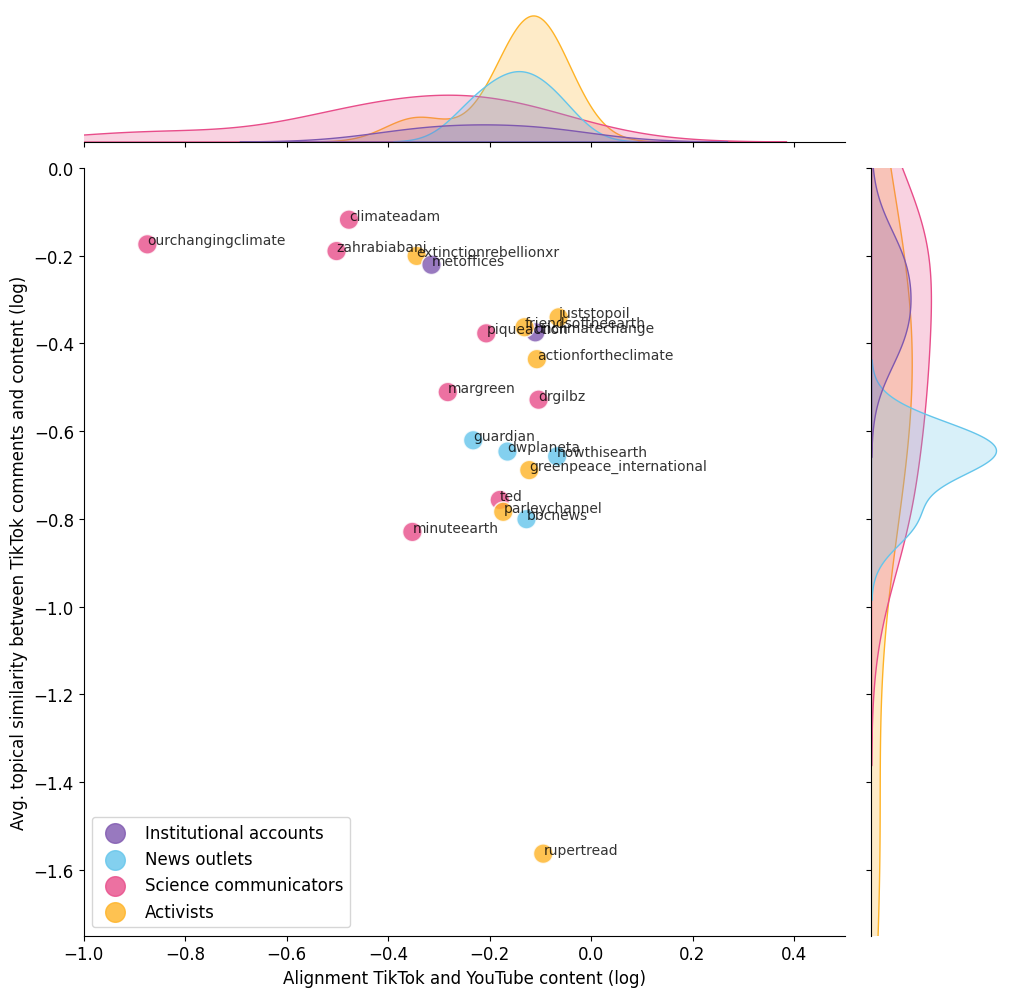

In [38]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(15,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

# log scale for cossim_content_orig and cossim_ttcontent_ttcomments_orig
df_diff["cossim_content_orig_log"] = np.log(df_diff["cossim_content_orig"])
df_diff["cossim_ttcontent_ttcomments_orig_log"] = np.log(df_diff["cossim_ttcontent_ttcomments_orig"])
# jointplot with color coding based on creator type from dict_type_creator

sns.jointplot(x="cossim_content_orig_log", y="cossim_ttcontent_ttcomments_orig_log", data=df_diff, hue="type", kind="scatter", palette=list_colors, height=10, alpha=0.8, s=200, legend=False)

# scatter plot with color coding based on creator type from dict_type_creator
#plt.scatter(df_diff["diff_content"], df_diff["diff_ttcomments_ttcontent"], c=[list_colors[list_types.index(dict_type_creator[creator])] for creator in df_diff["creator"]], s=200, alpha=0.8)
plt.xlabel("Alignment TikTok and YouTube content (log)", fontsize=12)
plt.ylabel("Avg. topical similarity between TikTok comments and content (log)", fontsize=12)
#plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by creator type", fontsize=14)
# annotate points with creator names
for i, txt in enumerate(df_diff["creator"]):
    plt.annotate(txt, (df_diff["cossim_content_orig_log"][i], df_diff["cossim_ttcontent_ttcomments_orig_log"][i]), fontsize=10, alpha=0.8)

# change x and y ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# start xlim and ylim at 0.1
plt.xlim(-1, 0.5)
plt.ylim(-1.75, 0)

# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)

plt.legend(loc="lower left", fontsize=12)
plt.show()

### Popularity

In [188]:
# load dictionary_more
with open("dictionary_popularity.pkl", "rb") as f:
    dict_type_creator = pickle.load(f)

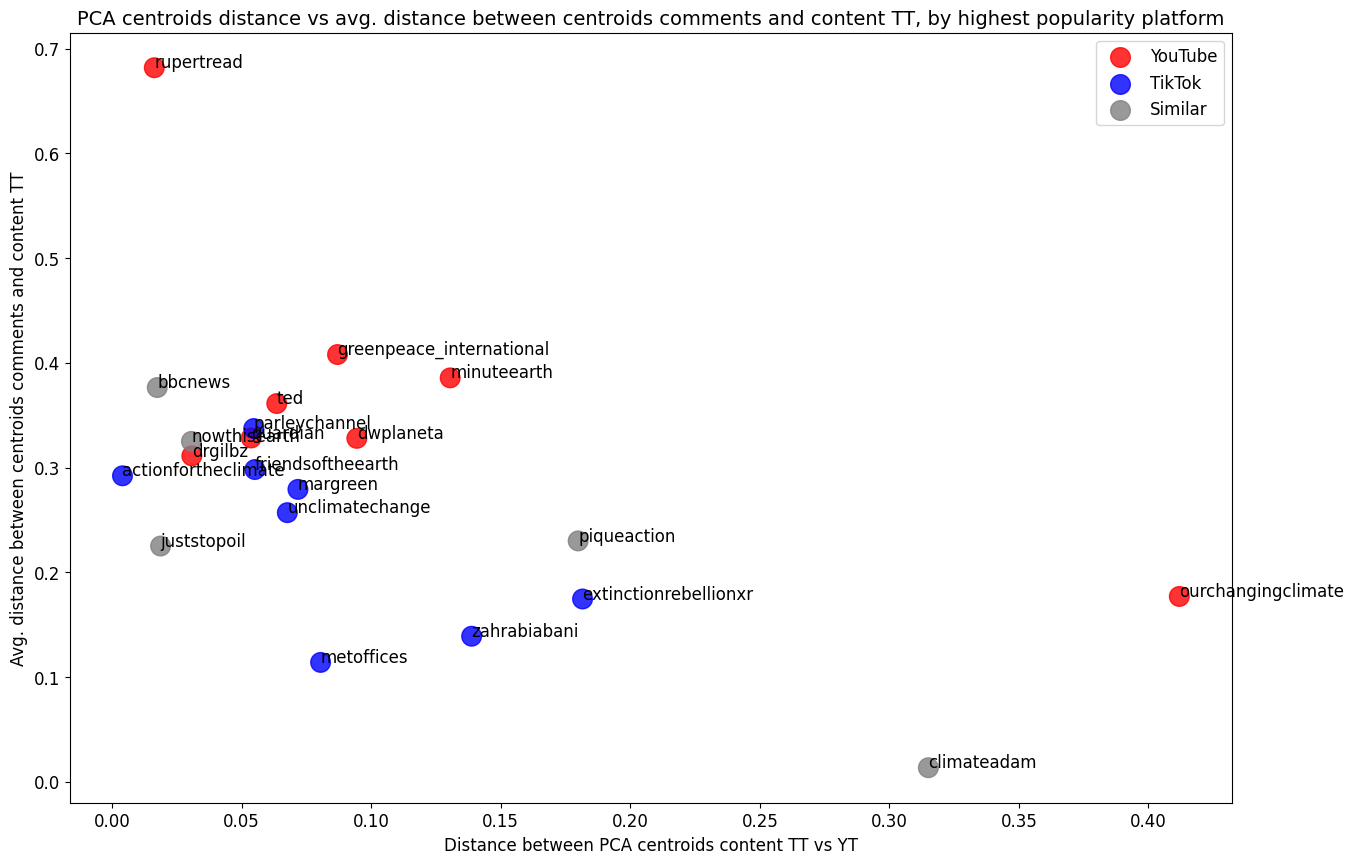

In [189]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(15,10))
list_types = ["yt", "tt", "similar"]
list_names_types = ["YouTube", "TikTok", "Similar"]
list_colors = ["red", "blue", "grey"]

# scatter plot with color coding based on creator type from dict_type_creator
plt.scatter(df_diff["diff_content"], df_diff["diff_ttcomments_ttcontent"], c=[list_colors[list_types.index(dict_type_creator[creator])] for creator in df_diff["creator"]], s=200, alpha=0.8)
plt.xlabel("Distance between PCA centroids content TT vs YT", fontsize=12)
plt.ylabel("Avg. distance between centroids comments and content TT", fontsize=12)
plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by highest popularity platform", fontsize=14)
# annotate points with creator names
for i, txt in enumerate(df_diff["creator"]):
    plt.annotate(txt, (df_diff["diff_content"][i], df_diff["diff_ttcomments_ttcontent"][i]), fontsize=12)

# change x and y ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add symbols legend
plt.scatter([], [], color="red", s=200, label="YouTube", alpha=0.8)
plt.scatter([], [], color="blue", s=200, label="TikTok", alpha=0.8)
plt.scatter([], [], color="grey", s=200, label="Similar", alpha=0.8)

plt.legend(loc="best", fontsize=12)
plt.show()

### Old plots for YT

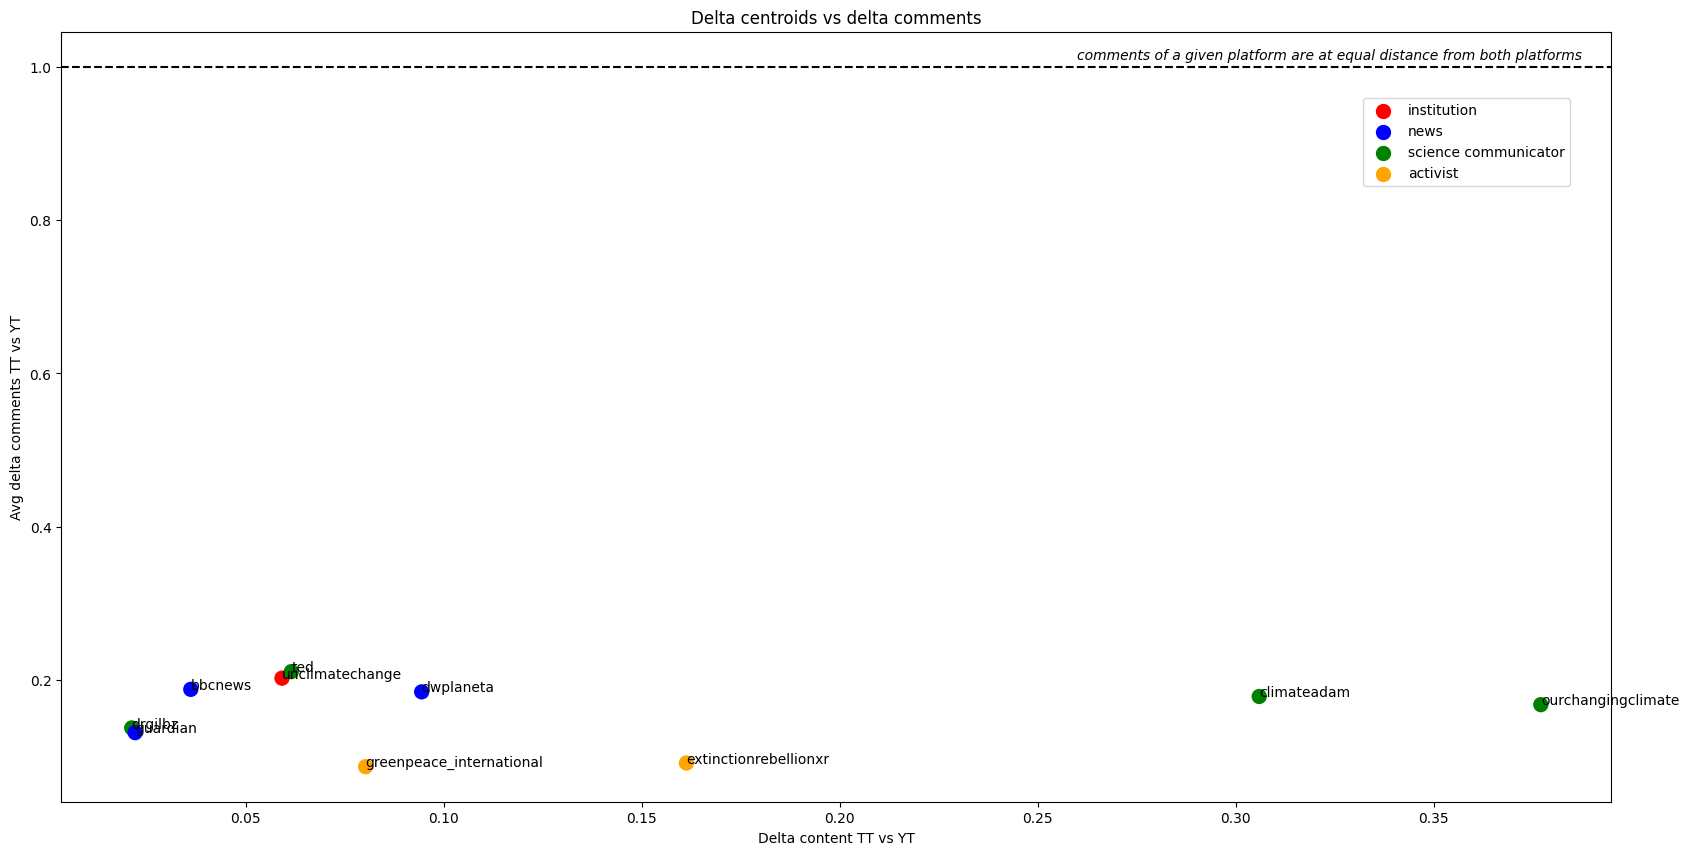

In [62]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(20,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]
# scatter plot with color coding based on creator type from dict_type_creator
plt.scatter(df_diff["diff_centroids"], df_diff["diff_ytcomments_ytcontent"], c=[list_colors[list_types.index(dict_type_creator[creator])] for creator in df_diff["creator"]], s=100)
plt.xlabel("Delta content TT vs YT")
plt.ylabel("Avg delta comments TT vs YT")
plt.title("Delta centroids vs delta comments")
# annotate points with creator names
for i, txt in enumerate(df_diff["creator"]):
    plt.annotate(txt, (df_diff["diff_centroids"][i], df_diff["diff_ytcomments_ytcontent"][i]))

# add hline at y=1
plt.axhline(y=1, color='black', linestyle='--')
# annotate hline in italic
plt.annotate("comments of a given platform are at equal distance from both platforms", (0.26, 1.01), style='italic', fontsize=10)

# add symbols legend
plt.scatter([], [], color="red", s=100, label="institution")
plt.scatter([], [], color="blue", s=100, label="news")
plt.scatter([], [], color="green", s=100, label="science communicator")
plt.scatter([], [], color="orange", s=100, label="activist")

plt.legend(loc=(0.84, 0.8), fontsize=10)
plt.show()

### Old plots

In [20]:
dictionary_channelid = {"unclimatechange": "UCuLEr-GWiwCBB6zBDX3elOQ",
                        #"natgeo": "UCpVm7bg6pXKo1Pr6k5kxG9A",
                        #"nbcnews": "UCeY0bbntWzzVIaj2z3QigXg",
                        "bbcnews": "UC16niRr50-MSBwiO3YDb3RA",
                        "climateadam": "UCCu5wtZ5uOWZp_roz7wHPfg",
                        "drgilbz": "UCjaBxCyjLpIRyKOd8uw_S4w",
                        "dwplaneta": "UCb72Gn5LXaLEcsOuPKGfQOg",
                        "extinctionrebellionxr": "UCYThdLKE6TDwBJh-qDC6ICA",
                        "greenpeace_international": "UCTDTSx8kbxGECZJxOa9mIKA",
                        "guardian": "UCHpw8xwDNhU9gdohEcJu4aA",
                        "ourchangingclimate": "UCNXvxXpDJXp-mZu3pFMzYHQ",
                        "ted": "UCAuUUnT6oDeKwE6v1NGQxug"} 

list_creators = list(dictionary_channelid.keys())

In [21]:
# open diff centroids data
with open("./dataframes/df_diff_centroids.pkl", "rb") as f:
    diff_centroids = pickle.load(f)

In [22]:
diff_centroids

,creator,diff_centroids,cossim_content_orig
0,unclimatechange,0.102619,0.895759
1,bbcnews,0.015932,0.856167
2,climateadam,0.391809,0.615216
3,drgilbz,0.064777,0.892502
4,dwplaneta,0.152555,0.835375
5,extinctionrebellionxr,0.132276,0.699491
6,greenpeace_international,0.101707,0.859551
7,guardian,0.168333,0.770581
8,ourchangingclimate,0.389302,0.414172
9,ted,0.103356,0.812637


In [ ]:
# ratios only yt
# plot ratio similarities
plt.figure(figsize=(20,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]

for creator in list_creators:
    # open ratios/sim_tt file
    with open("./ratios/ratios_sim_tt_" + creator + ".pkl", 'rb') as f:
        list_ratios_tt = pickle.load(f)
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + ".pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    plt.scatter(mean_tt, mean_yt, c=list_colors[list_types.index(dict_type_creator[creator])], s=100)

    plt.annotate(creator, (mean_tt, mean_yt))

plt.xlabel("Mean similarity TT")
plt.ylabel("Mean similarity YT")
plt.title("Mean similarity TT vs mean similarity YT, avg. of ratios video-comments and other videos-comments")

# add horizontal and vertical lines
plt.axhline(y=1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')

# add symbols legend
plt.scatter([], [], color="red", s=100, label="institution")
plt.scatter([], [], color="blue", s=100, label="news")
plt.scatter([], [], color="green", s=100, label="science communicator")
plt.scatter([], [], color="orange", s=100, label="activist")

plt.legend(loc=(0.84, 0.8), fontsize=10)
plt.show()


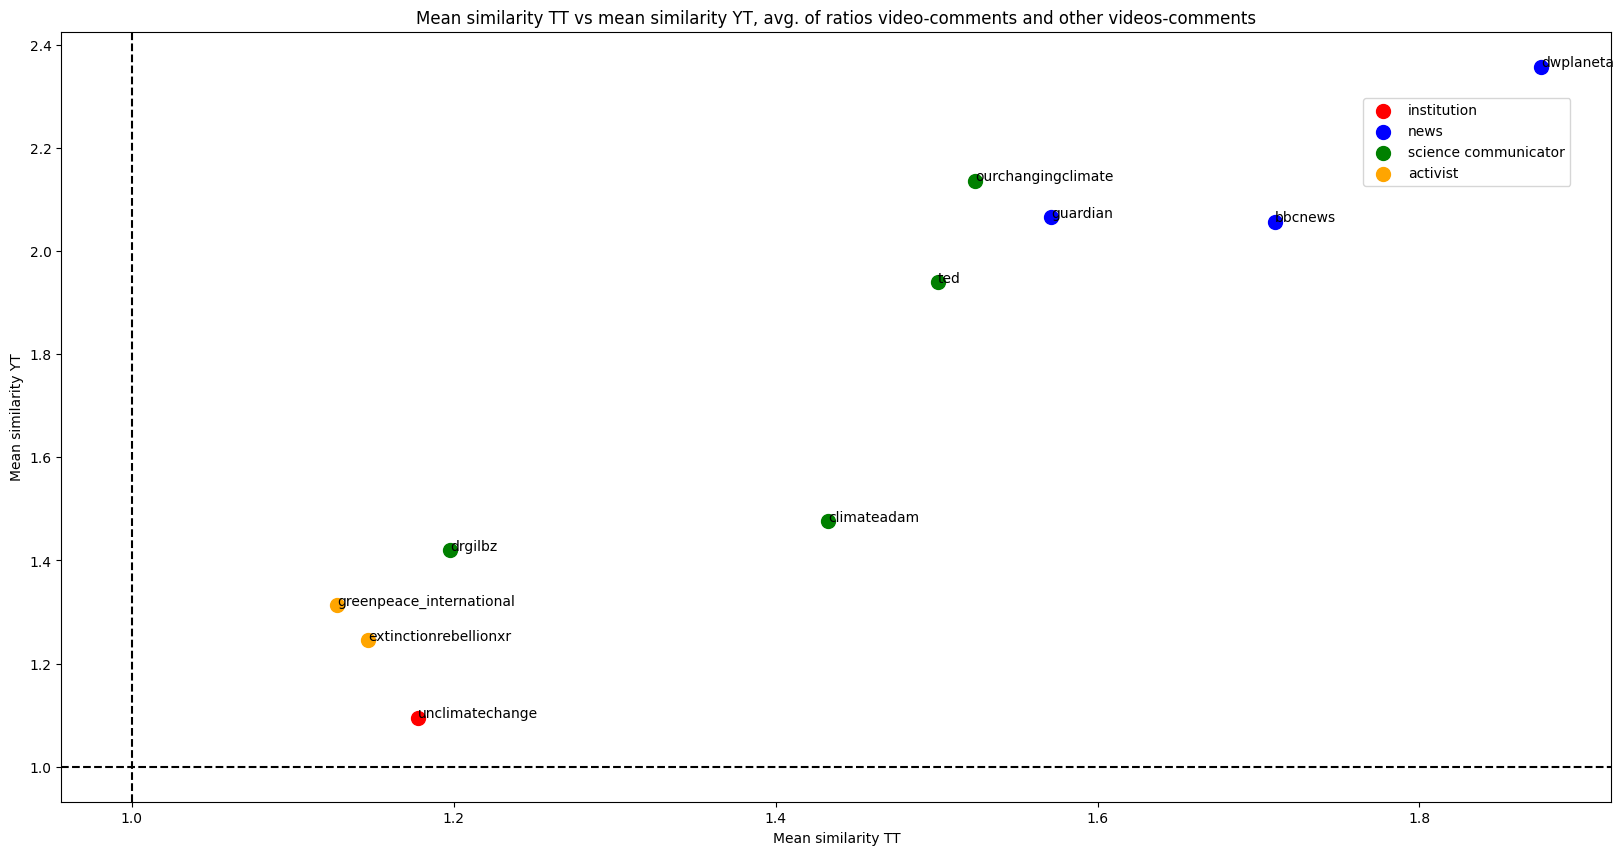

In [17]:
# plot ratio similarities
plt.figure(figsize=(20,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]

for creator in list_creators:
    # open ratios/sim_tt file
    with open("./ratios/ratios_sim_tt_" + creator + ".pkl", 'rb') as f:
        list_ratios_tt = pickle.load(f)
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + ".pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    plt.scatter(mean_tt, mean_yt, c=list_colors[list_types.index(dict_type_creator[creator])], s=100)

    plt.annotate(creator, (mean_tt, mean_yt))

plt.xlabel("Mean similarity TT")
plt.ylabel("Mean similarity YT")
plt.title("Mean similarity TT vs mean similarity YT, avg. of ratios video-comments and other videos-comments")

# add horizontal and vertical lines
plt.axhline(y=1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')

# add symbols legend
plt.scatter([], [], color="red", s=100, label="institution")
plt.scatter([], [], color="blue", s=100, label="news")
plt.scatter([], [], color="green", s=100, label="science communicator")
plt.scatter([], [], color="orange", s=100, label="activist")

plt.legend(loc=(0.84, 0.8), fontsize=10)
plt.show()


Plot strength comments-relative video vs. difference in centroids (difference of content)

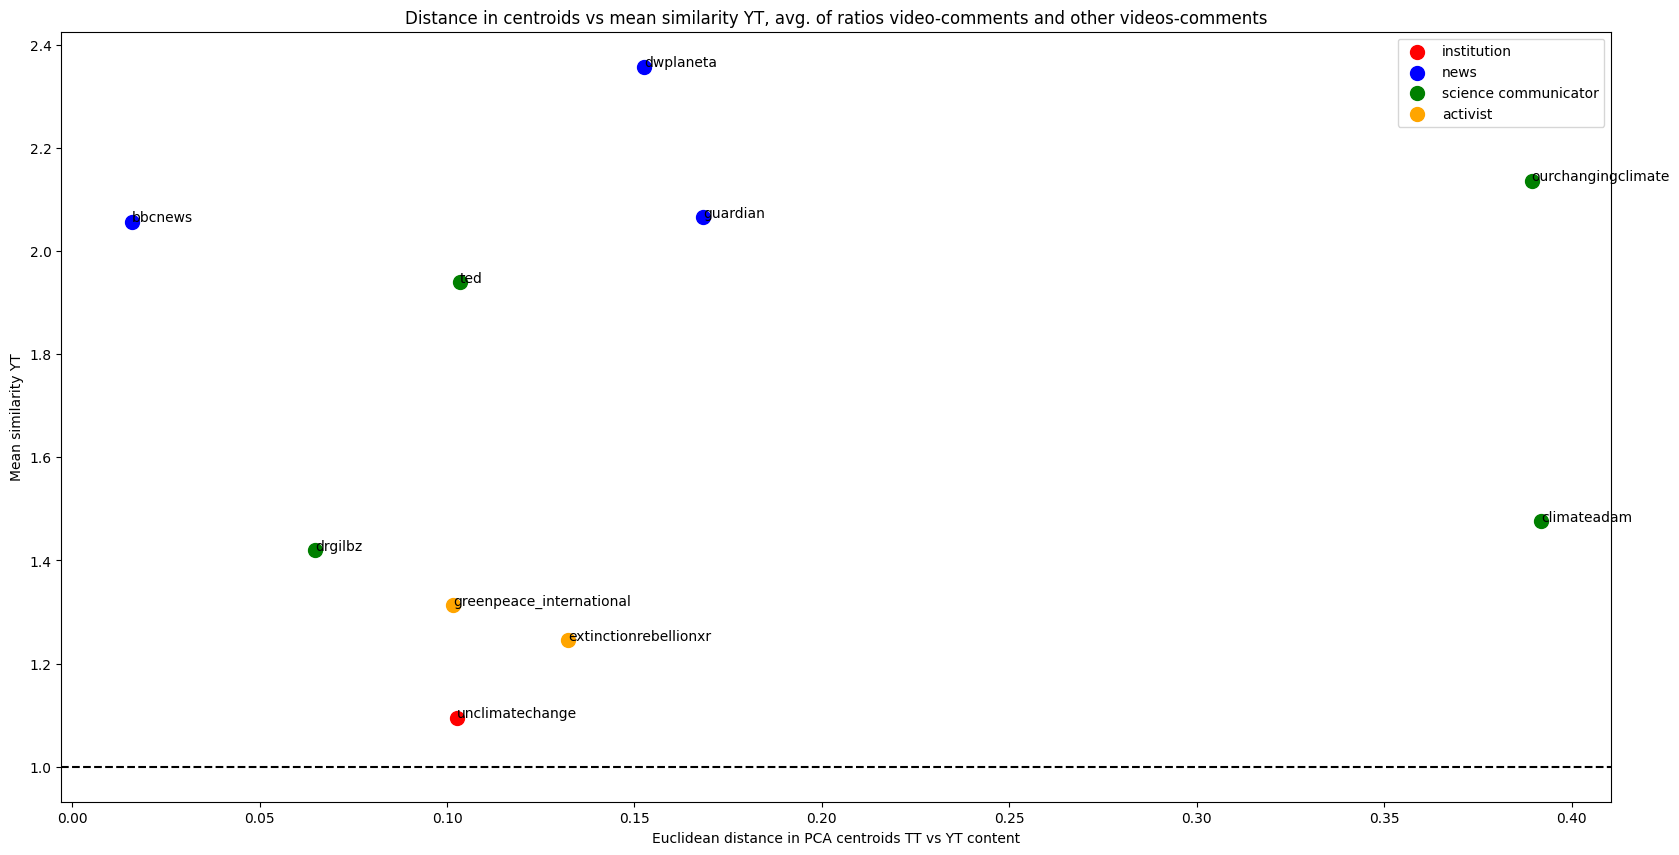

In [25]:
# plot ratio similarities
plt.figure(figsize=(20,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]

for creator in list_creators:
    # open ratios/sim_tt file
    with open("./ratios/ratios_sim_tt_" + creator + ".pkl", 'rb') as f:
        list_ratios_tt = pickle.load(f)
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + ".pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    # get difference in centroids for creator
    diff = diff_centroids[diff_centroids["creator"]==creator]["diff_centroids"].values[0]

    plt.scatter(diff, mean_yt, c=list_colors[list_types.index(dict_type_creator[creator])], s=100)

    plt.annotate(creator, (diff, mean_yt))

plt.xlabel("Euclidean distance in PCA centroids TT vs YT content") 
plt.ylabel("Mean similarity YT")
plt.title("Distance in centroids vs mean similarity YT, avg. of ratios video-comments and other videos-comments")

# add horizontal and vertical lines
plt.axhline(y=1, color='black', linestyle='--')

# add symbols legend
plt.scatter([], [], color="red", s=100, label="institution")
plt.scatter([], [], color="blue", s=100, label="news")
plt.scatter([], [], color="green", s=100, label="science communicator")
plt.scatter([], [], color="orange", s=100, label="activist")

plt.legend(fontsize=10)
plt.show()


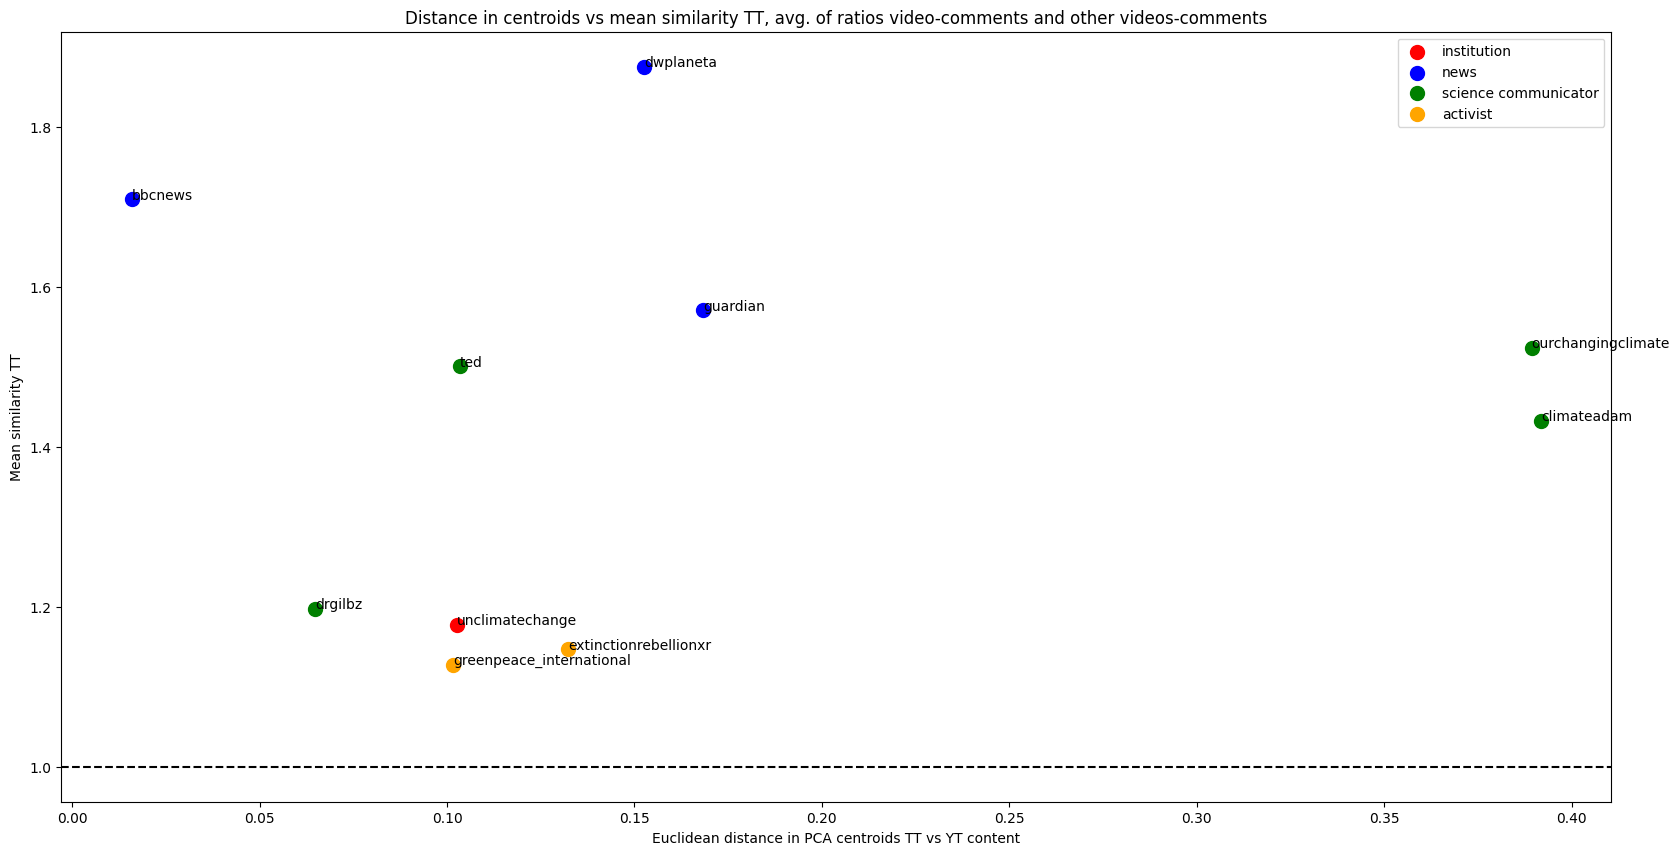

In [26]:
# plot ratio similarities
plt.figure(figsize=(20,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]

for creator in list_creators:
    # open ratios/sim_tt file
    with open("./ratios/ratios_sim_tt_" + creator + ".pkl", 'rb') as f:
        list_ratios_tt = pickle.load(f)
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + ".pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    # get difference in centroids for creator
    diff = diff_centroids[diff_centroids["creator"]==creator]["diff_centroids"].values[0]

    plt.scatter(diff, mean_tt, c=list_colors[list_types.index(dict_type_creator[creator])], s=100)

    plt.annotate(creator, (diff, mean_tt))

plt.xlabel("Euclidean distance in PCA centroids TT vs YT content") 
plt.ylabel("Mean similarity TT")
plt.title("Distance in centroids vs mean similarity TT, avg. of ratios video-comments and other videos-comments")

# add horizontal and vertical lines
plt.axhline(y=1, color='black', linestyle='--')

# add symbols legend
plt.scatter([], [], color="red", s=100, label="institution")
plt.scatter([], [], color="blue", s=100, label="news")
plt.scatter([], [], color="green", s=100, label="science communicator")
plt.scatter([], [], color="orange", s=100, label="activist")

plt.legend(fontsize=10)
plt.show()


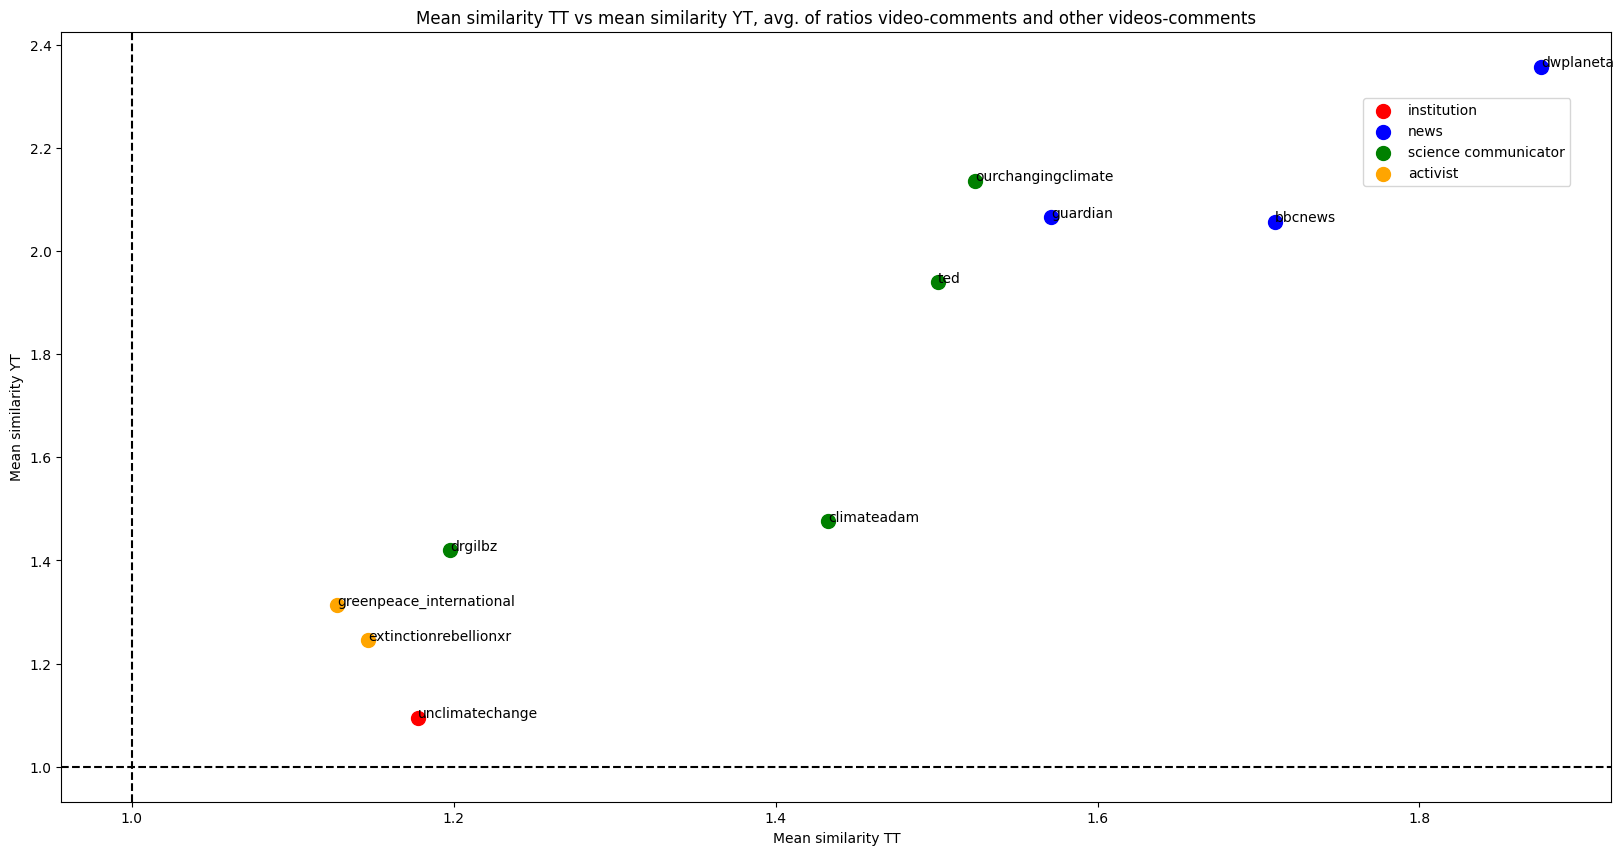

In [72]:
# plot ratio similarities
plt.figure(figsize=(20,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["red", "blue", "green", "orange"]

for creator in list_creators:
    # open ratios/sim_tt file
    with open("./ratios/ratios_sim_tt_" + creator + ".pkl", 'rb') as f:
        list_ratios_tt = pickle.load(f)
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + ".pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    plt.scatter(mean_tt, mean_yt, c=list_colors[list_types.index(dict_type_creator[creator])], s=100)

    plt.annotate(creator, (mean_tt, mean_yt))

plt.xlabel("Mean similarity TT")
plt.ylabel("Mean similarity YT")
plt.title("Mean similarity TT vs mean similarity YT, avg. of ratios video-comments and other videos-comments")

# add horizontal and vertical lines
plt.axhline(y=1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')

# add symbols legend
plt.scatter([], [], color="red", s=100, label="institution")
plt.scatter([], [], color="blue", s=100, label="news")
plt.scatter([], [], color="green", s=100, label="science communicator")
plt.scatter([], [], color="orange", s=100, label="activist")

plt.legend(loc=(0.84, 0.8), fontsize=10)
plt.show()


Check in the intersection and only platforms

In [72]:
creator = "climateadam"

with open("./ratios/ratios_only_tt_"+creator+".pkl", "rb") as f:
    list_ratio_only_tt = pickle.load(f)

with open("./ratios/ratios_only_yt_"+creator+".pkl", "rb") as f:
    list_ratio_only_yt = pickle.load(f)

with open("./ratios/ratios_both_tt_"+creator+".pkl", "rb") as f:
    list_ratio_both_tt = pickle.load(f)

with open("./ratios/ratios_both_yt_"+creator+".pkl", "rb") as f:
    list_ratio_both_yt = pickle.load(f)

In [73]:
# print mean and std of ratios
print("Mean ratio only TT: ", np.mean(list_ratio_only_tt))
print("Std ratio only TT: ", np.std(list_ratio_only_tt))
print("")
print("Mean ratio only YT: ", np.mean(list_ratio_only_yt))
print("Std ratio only YT: ", np.std(list_ratio_only_yt))
print("")
print("Mean ratio both TT: ", np.mean(list_ratio_both_tt))
print("Std ratio both TT: ", np.std(list_ratio_both_tt))
print("")
print("Mean ratio both YT: ", np.mean(list_ratio_both_yt))
print("Std ratio both YT: ", np.std(list_ratio_both_yt))

Mean ratio only TT:  1.4043075
Std ratio only TT:  0.6908503

Mean ratio only YT:  1.4621485
Std ratio only YT:  0.36262167

Mean ratio both TT:  1.456939
Std ratio both TT:  1.1508187

Mean ratio both YT:  1.4287866
Std ratio both YT:  0.5149745


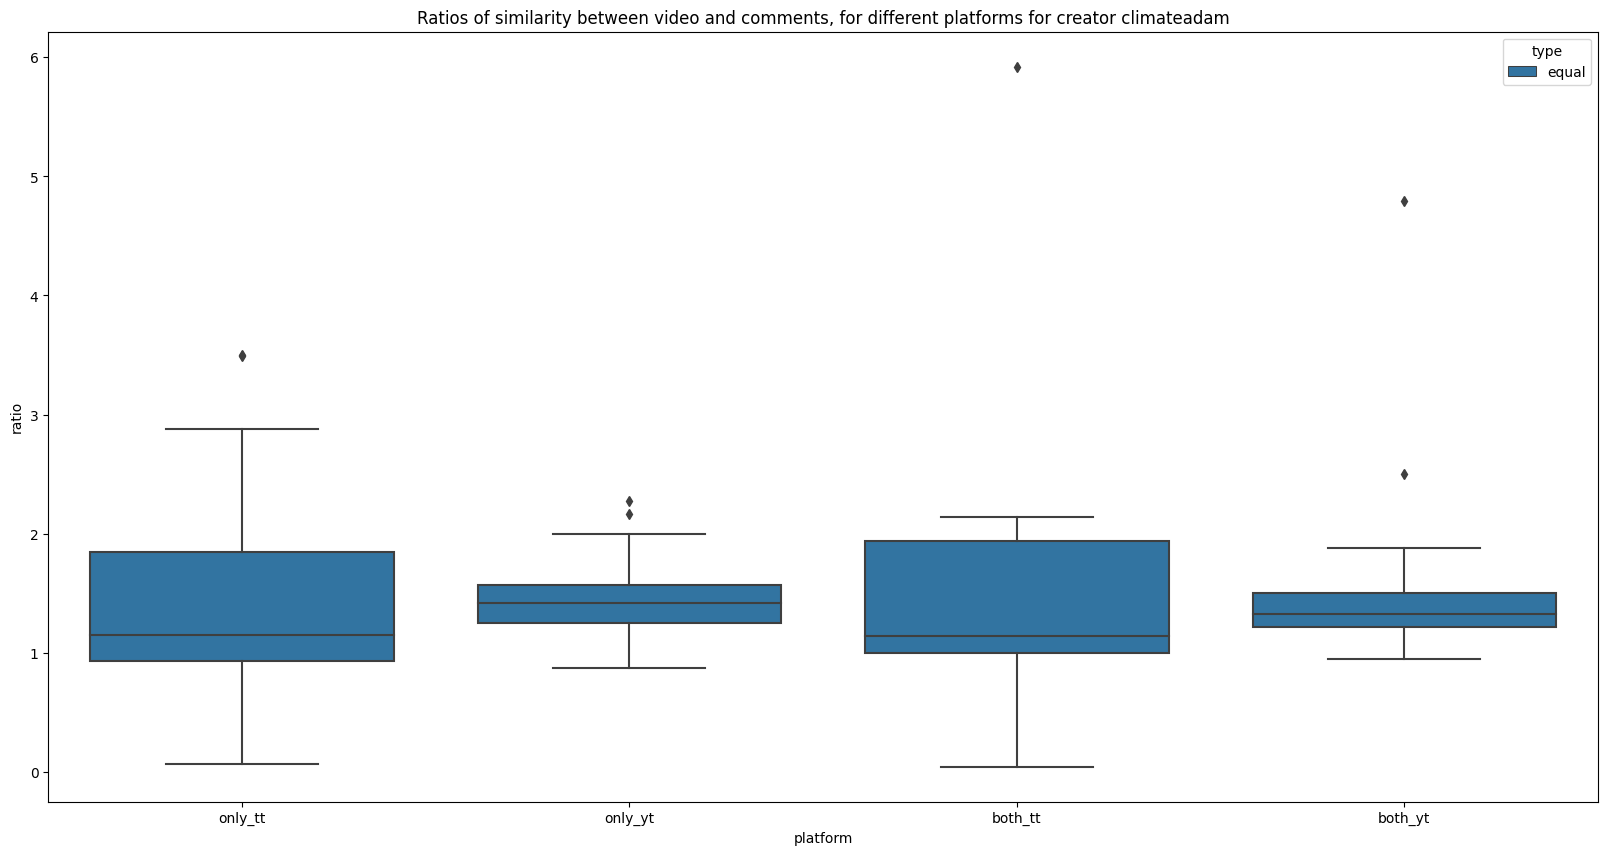

In [74]:
# plot ratio similarities (boxplot)

# create dataframe
df_ratios = pd.DataFrame(columns=["ratio", "platform", "type"])
df_ratios["ratio"] = list_ratio_only_tt + list_ratio_only_yt + list_ratio_both_tt + list_ratio_both_yt
df_ratios["platform"] = ["only_tt"]*len(list_ratio_only_tt) + ["only_yt"]*len(list_ratio_only_yt) + ["both_tt"]*len(list_ratio_both_tt) + ["both_yt"]*len(list_ratio_both_yt)
df_ratios["type"] = [dict_type_creator[creator]]*len(df_ratios["ratio"])

# plot boxplot
plt.figure(figsize=(20,10))
sns.boxplot(x="platform", y="ratio", data=df_ratios, hue="type")
plt.title("Ratios of similarity between video and comments, for different platforms for creator "+creator)
plt.show()

## Ratios

In [6]:
dictionary_channelid = {"unclimatechange": "UCuLEr-GWiwCBB6zBDX3elOQ",
                        #"natgeo": "UCpVm7bg6pXKo1Pr6k5kxG9A",
                        #"nbcnews": "UCeY0bbntWzzVIaj2z3QigXg",
                        "bbcnews": "UC16niRr50-MSBwiO3YDb3RA",
                        "climateadam": "UCCu5wtZ5uOWZp_roz7wHPfg",
                        "drgilbz": "UCjaBxCyjLpIRyKOd8uw_S4w",
                        "dwplaneta": "UCb72Gn5LXaLEcsOuPKGfQOg",
                        "extinctionrebellionxr": "UCYThdLKE6TDwBJh-qDC6ICA",
                        "greenpeace_international": "UCTDTSx8kbxGECZJxOa9mIKA",
                        "guardian": "UCHpw8xwDNhU9gdohEcJu4aA",
                        "ourchangingclimate": "UCNXvxXpDJXp-mZu3pFMzYHQ",
                        "ted": "UCAuUUnT6oDeKwE6v1NGQxug"} 

dictionary_channelid_2 = {"juststopoil": "UC-t4U1Azf8AOkCBJILSNBmw",
                        "minuteearth": "UCeiYXex_fwgYDonaTcSIk6w",
                        "metoffices": "UC40Tw2tFuMzK305mi7nj8rg",
                        "zahrabiabani": "UCuRimTRSnyVlSrN4aQVCCkA",   
                        #"declareemergency": "UCi2pVvNv5s_Nh4KipoGQXxQ",
                        #"thereviveseries": "UCvpfvQqheuQRZiVjiSh71sw",
                        #"climatt": "UCoSRNBi6F4jN0CYq-sRcOHQ",
                        "rupertread": "UCm7-jS-VzbR3xEqpBGYDPcQ",
                        "friendsoftheearth": "UC9qqyIuIUoRKTG6sE5rVlhg",
                        "parleychannel": "UCieB62vq-5QByMIcq-LMntg",
                        "actionfortheclimate": "UCbewlkCKbV1B3xmKwXa1qsA",
                        "piqueaction": "UCNf0NVrB9U8YF5sFpbsME4A",
                        "margreen": "UCUDFVYGkosHtan3lGnQttew",
                        "nowthisearth": "UCFH5dQAkGIqzcFYmM4tNtXw"}  

# merge dictionaries
dictionary_channelid.update(dictionary_channelid_2) 

list_creators = list(dictionary_channelid.keys())

In [7]:
dict_type_creator = {}  # key: creator, value: type
dict_type_creator["unclimatechange"] = "institution"
dict_type_creator["nbcnews"] = "news"
dict_type_creator["bbcnews"] = "news"
dict_type_creator["climateadam"] = "science_communicator"
dict_type_creator["drgilbz"] = "science_communicator"
dict_type_creator["dwplaneta"] = "news"
dict_type_creator["extinctionrebellionxr"] = "activist"
dict_type_creator["greenpeace_international"] = "activist"
dict_type_creator["guardian"] = "news"
dict_type_creator["ourchangingclimate"] = "science_communicator"
dict_type_creator["ted"] = "science_communicator"
dict_type_creator["juststopoil"] = "activist"
dict_type_creator["minuteearth"] = "science_communicator"
dict_type_creator["metoffices"] = "institution"
dict_type_creator["zahrabiabani"] = "science_communicator"
dict_type_creator["rupertread"] = "activist"
dict_type_creator["friendsoftheearth"] = "activist"
dict_type_creator["parleychannel"] = "activist"
dict_type_creator["actionfortheclimate"] = "activist"
dict_type_creator["piqueaction"] = "science_communicator"
dict_type_creator["margreen"] = "science_communicator"
dict_type_creator["nowthisearth"] = "news"


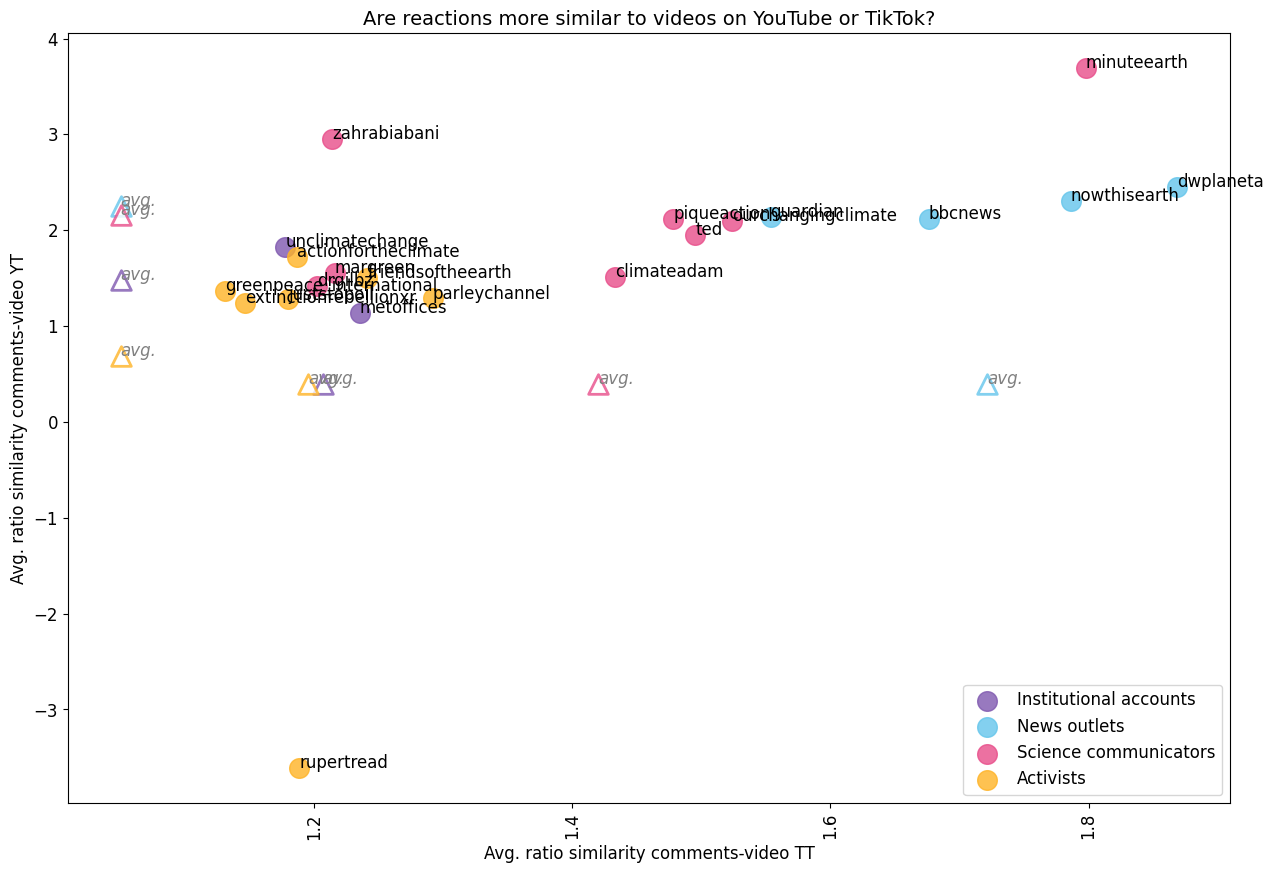

In [153]:
# plot ratio similarities
plt.figure(figsize=(15,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]
map_types_annot = {"institution": "avg. institutions", 
                    "news": "avg. news", 
                    "science_communicator": "avg. communicators",
                    "activist": "avg. activists"}
# list_types = ["more popular on YT", "more popular on TT", "same popularity"]
# list_colors = ["red", "blue", "green"]

tt_avg_ratios = {}
yt_avg_ratios = {}
for creator in list_creators:
    # open ratios/sim_tt file
    try:
        with open("./ratios/ratios_sim_tt_" + creator + "_newdata.pkl", 'rb') as f:
            list_ratios_tt = pickle.load(f)
    except:
        print("No TT file for creator ", creator)
        continue
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + "_newdata.pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    plt.scatter(mean_tt, mean_yt, c=list_colors[list_types.index(dict_type_creator[creator])], s=200, alpha=0.8)

    plt.annotate(creator, (mean_tt, mean_yt), fontsize=12)

    # get type of creator
    type_creator = dict_type_creator[creator]

    if type_creator not in tt_avg_ratios:
        tt_avg_ratios[type_creator] = []
    tt_avg_ratios[type_creator].append(mean_tt)

    if type_creator not in yt_avg_ratios:
        yt_avg_ratios[type_creator] = []
    yt_avg_ratios[type_creator].append(mean_yt)

# plot the average of the ratios for each type of creator on the x axis
for type_creator in tt_avg_ratios:
    # scatter with only contour of symbol
    plt.scatter(np.mean(tt_avg_ratios[type_creator]), 0.4, c="white", s=200, marker="^", alpha=0.8, edgecolors=list_colors[list_types.index(type_creator)], linewidths=2)

    # also on the y axis
    plt.scatter(1.05, np.mean(yt_avg_ratios[type_creator]), c="white", s=200, marker="^", alpha=0.8, edgecolors=list_colors[list_types.index(type_creator)], linewidths=2)

    # annotate with type of creator from map_types_annot
    plt.annotate("avg.", (np.mean(tt_avg_ratios[type_creator]), 0.4), fontsize=12, color="grey", style="italic")
    plt.annotate("avg.", (1.05, np.mean(yt_avg_ratios[type_creator])), fontsize=12, color="grey", style="italic")

plt.xlabel("Avg. ratio similarity comments-video TT", fontsize=12)
plt.ylabel("Avg. ratio similarity comments-video YT", fontsize=12)
plt.title("Are reactions more similar to videos on YouTube or TikTok?", fontsize=14)

# rotate xticks
plt.xticks(rotation=90)

# size of xticks and yticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)

plt.legend(loc="best", fontsize=12)
plt.show()


0.043459196 0.0469013
0.1318357 0.2874009
0.05451103 0.19016096
0.03880906 0.1546583
0.14899836 0.38467607
0.040227696 0.09397379
0.027309928 0.08323237
0.10552073 0.29378
0.11571134 0.29937243
0.08463035 0.23830749
0.06318005 0.09133084
0.13265142 0.40068248
0.06865073 0.089055076
0.046013422 0.30074036
0.020268463 0.057457104
0.06659361 0.12403442
0.06772019 0.019343488
0.040408984 0.11479541
0.09330243 0.14821781
0.04404663 0.14154154
0.12210579 0.22895546


<Figure size 1000x1000 with 0 Axes>

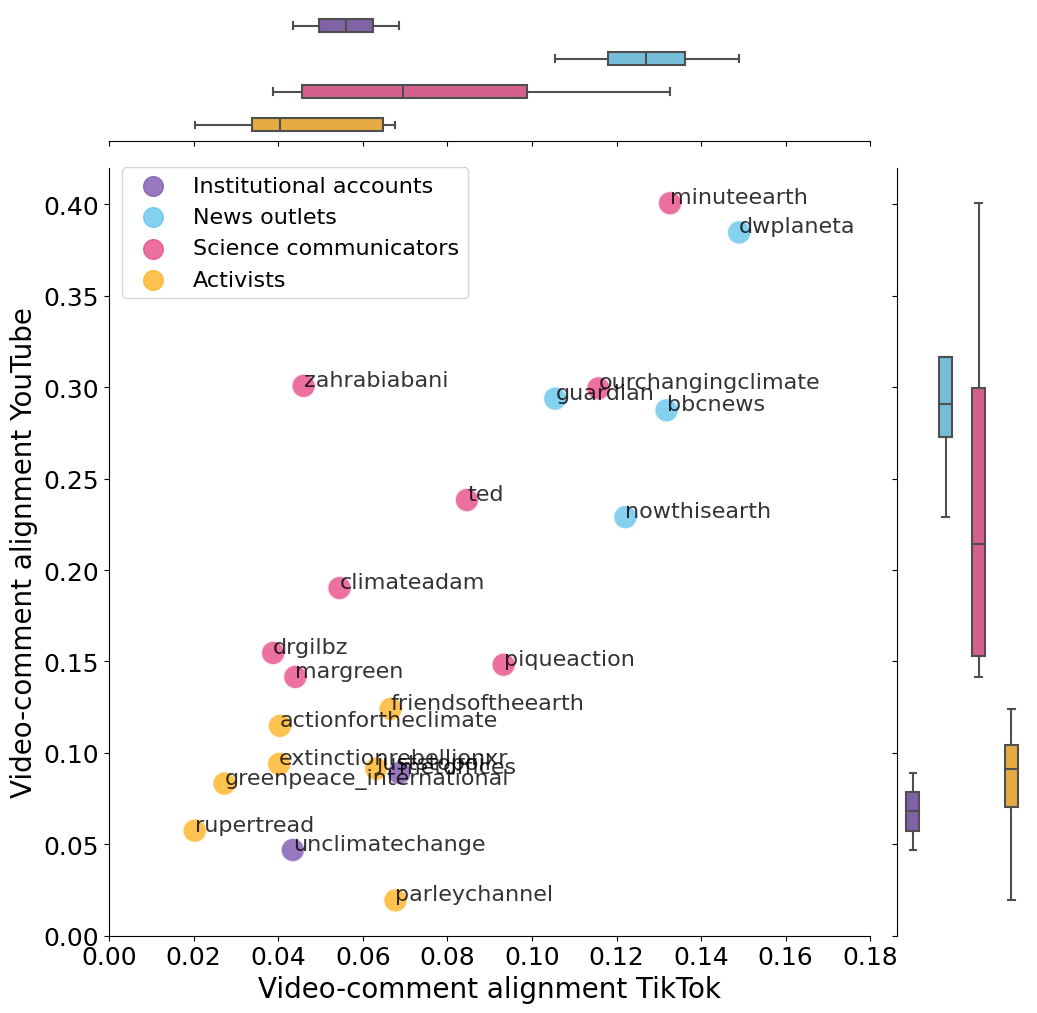

In [9]:
# plot ratio similarities
plt.figure(figsize=(10,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]
map_types_annot = {"institution": "avg. institutions", 
                    "news": "avg. news", 
                    "science_communicator": "avg. communicators",
                    "activist": "avg. activists"}
# list_types = ["more popular on YT", "more popular on TT", "same popularity"]
# list_colors = ["red", "blue", "green"]

list_plot = []
for creator in list_creators:
    # open ratios/sim_tt file
    try:
        # with open("./ratios/ratios_sim_tt_" + creator + "_newdata.pkl", 'rb') as f:
        #     list_ratios_tt = pickle.load(f)
        
        with open("./ratios/diff_cos_tt_" + creator + "_newdata.pkl", 'rb') as f:
            list_ratios_tt = pickle.load(f)
    except:
        print("No TT file for creator ", creator)
        continue
    # open ratios/sim_yt file
    with open("./ratios/diff_cos_yt_" + creator + "_newdata.pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    list_plot.append([creator, dict_type_creator[creator], mean_tt, mean_yt])

# create dataframe
list_plot = pd.DataFrame(list_plot, columns=["creator", "type", "mean_tt", "mean_yt"])

# use log scale
list_plot["mean_tt_log"] = np.log(list_plot["mean_tt"])
list_plot["mean_yt_log"] = np.log(list_plot["mean_yt"])

# jointplot with seaborn, color coded by type using list_colors and list_types, use log scale
#sns.jointplot(x="mean_tt", y="mean_yt", data=list_plot, hue="type", kind="scatter", palette=list_colors, height=10, alpha=0.8, s=300, legend=False)


# jointplot with color coding based on creator type from dict_type_creator, no kde distribution
g = sns.JointGrid(data=list_plot, x="mean_tt", y="mean_yt", hue="type", palette=list_colors, height=10)
sns.boxplot(list_plot, y=g.hue, x=g.x, ax=g.ax_marg_x, palette=list_colors, width=0.4, showfliers=False)


# # independent boxplot on the y axis, now it is cut off and not of the right width
sns.boxplot(list_plot, x=g.hue, y=g.y, palette=list_colors, width=0.4, ax=g.ax_marg_y, showfliers=False)
# remove axis of the boxplot

# leave some space between the boxplot and the scatterplot
g.ax_marg_x.set_xlim(0, 0.18)
g.ax_marg_y.set_ylim(0, 0.42)

g.plot_joint(sns.scatterplot, s=300, alpha=0.8, legend=False, markers="o")


# # annotate points with creator names
# for i, txt in enumerate(list_plot["creator"]):
#     plt.annotate(txt, (list_plot["mean_tt"][i], list_plot["mean_yt"][i]), fontsize=14, alpha=0.8)

g.set_axis_labels('x', 'y', fontsize=20)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Video-comment alignment TikTok')
g.ax_joint.set_ylabel('Video-comment alignment YouTube')

#plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by creator type", fontsize=14)
# annotate points with creator names
for i, txt in enumerate(list_plot["creator"]):
    print(list_plot["mean_tt"][i], list_plot["mean_yt"][i])
    g.ax_joint.annotate(txt, (list_plot["mean_tt"][i], list_plot["mean_yt"][i]), fontsize=16, alpha=0.8)


# plt.xlabel("Video-comment consistency TikTok", fontsize=20)
# plt.ylabel("Video-comment consistency YouTube", fontsize=20)
#plt.title("Are reactions more similar to videos on YouTube or TikTok?", fontsize=14)

# rotate xticks
# size of xticks and yticks
g.ax_joint.tick_params(axis='both', which='both', labelsize=18)


# # start x and y axis at 1
# plt.xlim(left=1)
# plt.ylim(bottom=1)

# # end x and y axis at 1.5
# plt.xlim(right=2.1)
# plt.ylim(top=4)

# # add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)

plt.legend(fontsize=16, loc=(-5.9,0.83))
plt.savefig("./video_comment_alignment.svg", format="svg")


ValueError: Could not interpret value `type` for parameter `hue`

<Figure size 1500x1000 with 0 Axes>

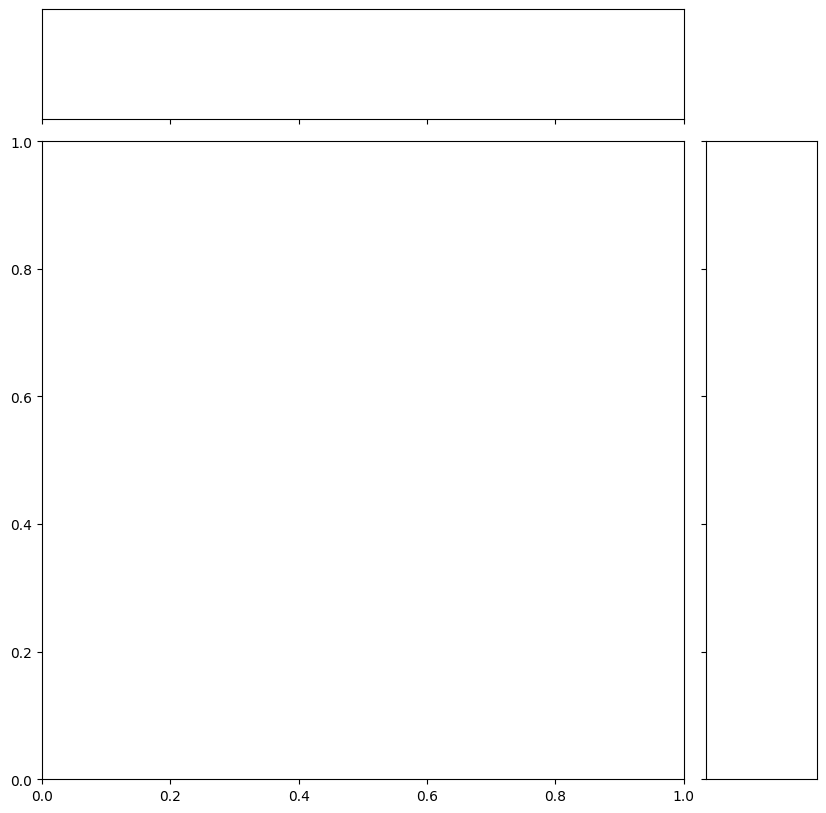

In [128]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(15,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]


# jointplot with color coding based on creator type from dict_type_creator, no kde distribution
g = sns.JointGrid(data=df_diff, x="cossim_content_orig", y="cossim_ttcontent_ttcomments_orig", hue="type", palette=list_colors, height=10)
sns.boxplot(df_diff, y=g.hue, x=g.x, ax=g.ax_marg_x, palette=list_colors, width=0.4, showfliers=False)


# # independent boxplot on the y axis, now it is cut off and not of the right width
sns.boxplot(df_diff, x=g.hue, y=g.y, palette=list_colors, width=0.4, ax=g.ax_marg_y, showfliers=False)
# remove axis of the boxplot

# leave some space between the boxplot and the scatterplot
g.ax_marg_x.set_xlim(0.3, 1.2)
g.ax_marg_y.set_ylim(0.1, 1)


g.plot_joint(sns.scatterplot, s=300, alpha=0.8, legend=False, markers="o")
# boxplot on the y axis, now it is cut off and not of the right width
#sns.boxplot(df_diff, x=g.hue, y=g.y, ax=g.ax_marg_y, palette=list_colors, width=0.5)

#sns.jointplot(x="cossim_content_orig", y="cossim_ttcontent_ttcomments_orig", data=df_diff, hue="type", kind="scatter", palette=list_colors, height=10, alpha=0.8, s=300, legend=False, markers="o")

# scatter plot with color coding based on creator type from dict_type_creator
#plt.scatter(df_diff["diff_content"], df_diff["diff_ttcomments_ttcontent"], c=[list_colors[list_types.index(dict_type_creator[creator])] for creator in df_diff["creator"]], s=200, alpha=0.8)
# JointGrid has a convenience function
g.set_axis_labels('x', 'y', fontsize=20)

# or set labels via the axes objects
g.ax_joint.set_xlabel('Platform-shift')
g.ax_joint.set_ylabel('Narrative-audience alignement TikTok')

#plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by creator type", fontsize=14)
# annotate points with creator names
for i, txt in enumerate(df_diff["creator"]):
    # annotate the scatterplot points
    g.ax_joint.annotate(txt, (df_diff["cossim_content_orig"][i], df_diff["cossim_ttcontent_ttcomments_orig"][i]), fontsize=16, alpha=0.8)

avg_types = {}
for type_creator in list_types:
    avg_types[type_creator] = [np.mean(df_diff[df_diff["type"]==type_creator]["cossim_ttcontent_ttcomments_orig"]), np.mean(df_diff[df_diff["type"]==type_creator]["cossim_content_orig"])]

# # plot avg_types
# for type_creator in list_types:
#     plt.scatter(avg_types[type_creator][1], avg_types[type_creator][0], color=list_colors[list_types.index(type_creator)], s=200, alpha=1, marker="*")
#     #plt.annotate(list_names_types[list_types.index(type_creator)], (avg_types[type_creator][1], avg_types[type_creator][0]), fontsize=12)

# change x and y ticks size
g.ax_joint.tick_params(axis='both', which='both', labelsize=18)



# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)
#plt.scatter([], [], color="black", s=200, marker="*", label="Avg. per creator type", alpha=0.4)

# choose legend location manually
plt.legend(fontsize=16, loc=(-5.9,0.01))

# save as svg
plt.savefig("./platformshift_creatoraudience.svg", format="svg")

/Users/arpe/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1000x1000 with 0 Axes>

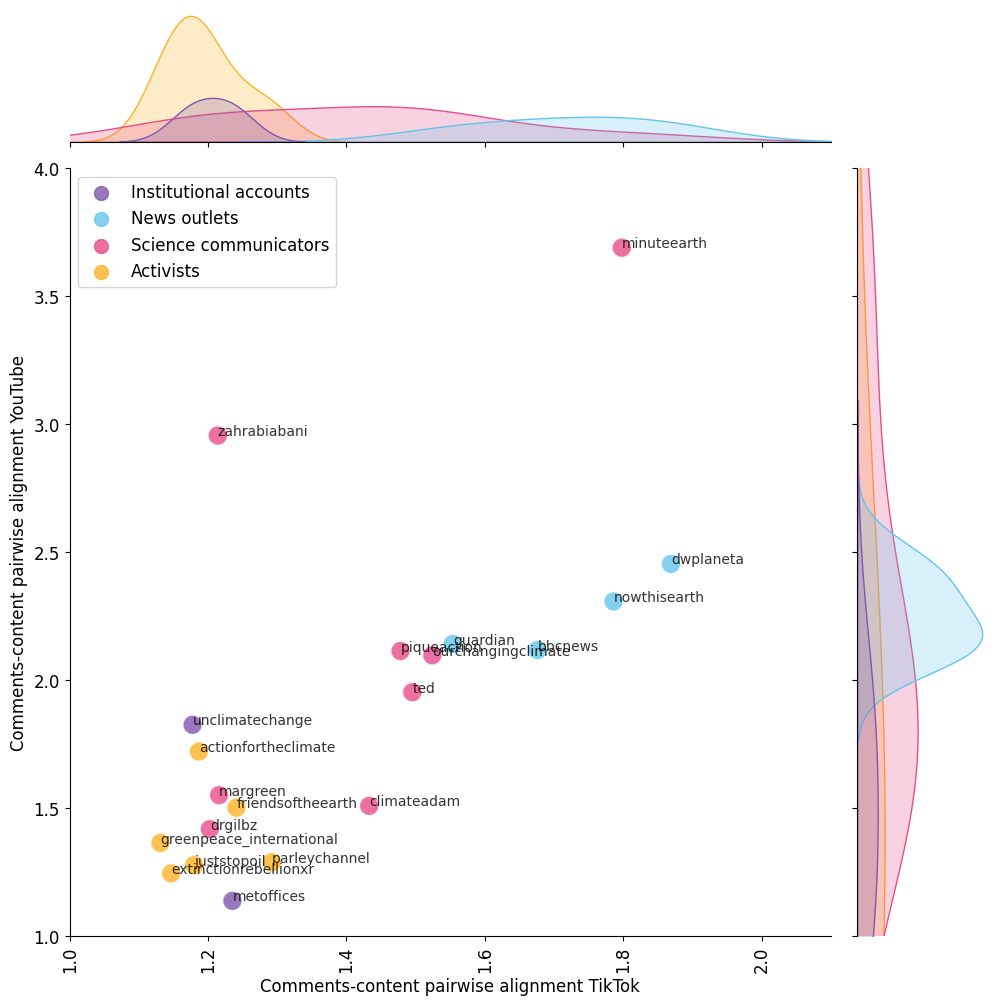

In [129]:
# NO LOG
plt.figure(figsize=(10,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]
map_types_annot = {"institution": "avg. institutions", 
                    "news": "avg. news", 
                    "science_communicator": "avg. communicators",
                    "activist": "avg. activists"}
# list_types = ["more popular on YT", "more popular on TT", "same popularity"]
# list_colors = ["red", "blue", "green"]

list_plot = []
for creator in list_creators:
    # open ratios/sim_tt file
    try:
        with open("./ratios/ratios_sim_tt_" + creator + "_newdata.pkl", 'rb') as f:
            list_ratios_tt = pickle.load(f)
    except:
        print("No TT file for creator ", creator)
        continue
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + "_newdata.pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    list_plot.append([creator, dict_type_creator[creator], mean_tt, mean_yt])

# create dataframe
list_plot = pd.DataFrame(list_plot, columns=["creator", "type", "mean_tt", "mean_yt"])

# use log scale
list_plot["mean_tt_log"] = np.log(list_plot["mean_tt"])
list_plot["mean_yt_log"] = np.log(list_plot["mean_yt"])

# jointplot with seaborn, color coded by type using list_colors and list_types, use log scale
sns.jointplot(x="mean_tt", y="mean_yt", data=list_plot, hue="type", kind="scatter", palette=list_colors, height=10, alpha=0.8, s=200, legend=False)

# annotate points with creator names
for i, txt in enumerate(list_plot["creator"]):
    plt.annotate(txt, (list_plot["mean_tt"][i], list_plot["mean_yt"][i]), fontsize=10, alpha=0.8)


plt.xlabel("Comments-content pairwise alignment TikTok", fontsize=12)
plt.ylabel("Comments-content pairwise alignment YouTube", fontsize=12)
#plt.title("Are reactions more similar to videos on YouTube or TikTok?", fontsize=14)

# rotate xticks
plt.xticks(rotation=90)

# size of xticks and yticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# start x and y axis at 1
plt.xlim(left=1)
plt.ylim(bottom=1)

# end x and y axis at 1.5
plt.xlim(right=2.1)
plt.ylim(top=4)

# # add symbols legend
plt.scatter([], [], color="#7F58AF", s=100, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=100, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=100, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=100, label="Activists", alpha=0.8)

plt.legend(loc="best", fontsize=12)
plt.show()


### Trial mix plots

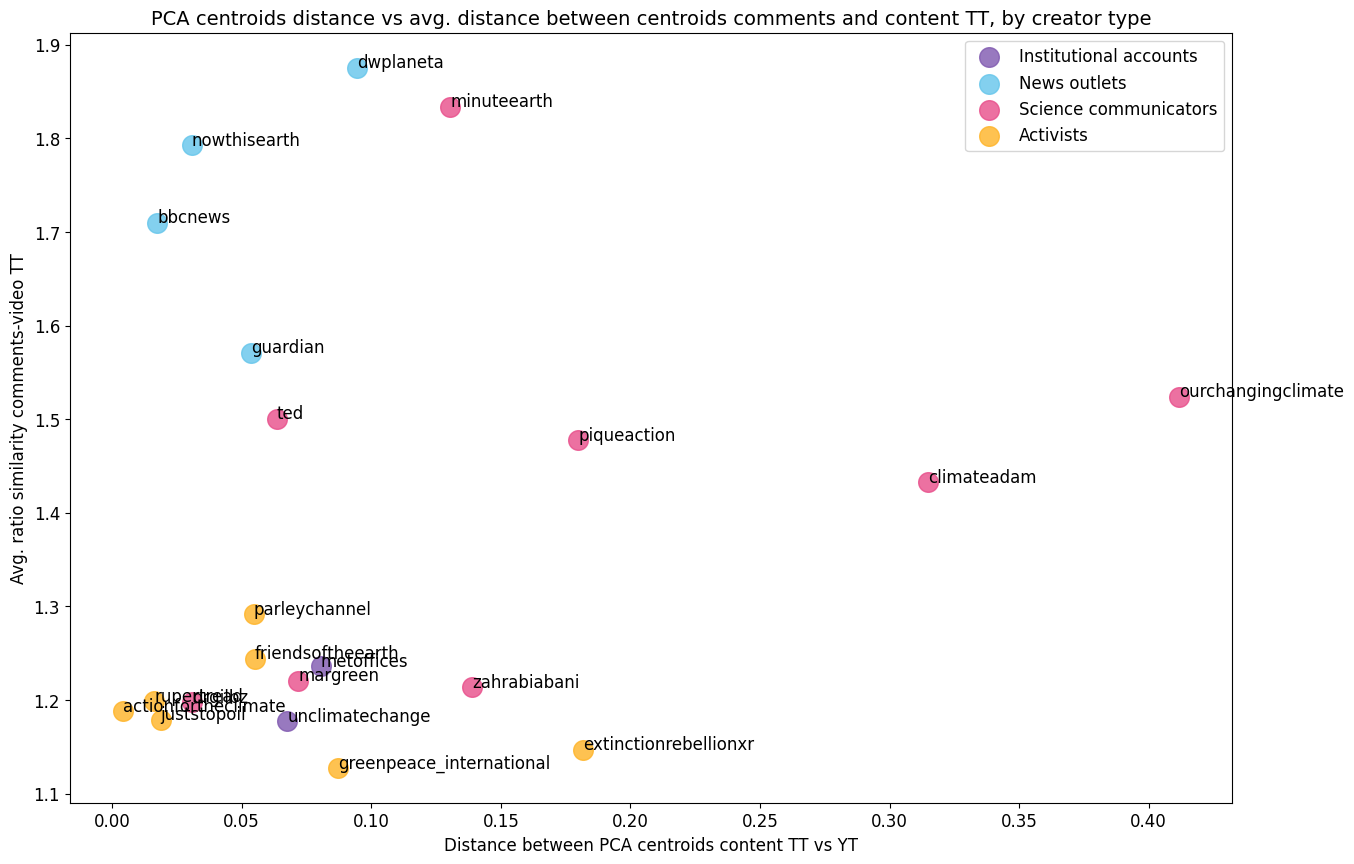

In [261]:
# plot diff_centroids (x-axis) vs avg_delta_comments (y-axis)
plt.figure(figsize=(15,10))
list_types = ["institution", "news", "science_communicator", "activist"]
list_names_types = ["Institutional accounts", "News outlets", "Science communicators", "Activists"]
list_colors = ["#7F58AF", "#64C5EB", "#E84D8A", "#FEB326"]

for creator in list_creators:
    with open("./ratios/ratios_sim_tt_" + creator + ".pkl", 'rb') as f:
        list_ratios_tt = pickle.load(f)
    mean_tt = np.mean(list_ratios_tt)
    # scatter plot with color coding based on creator type from dict_type_creator
    plt.scatter(df_diff[df_diff["creator"]==creator]["diff_content"], mean_tt, c=list_colors[list_types.index(dict_type_creator[creator])], s=200, alpha=0.8)

    plt.annotate(creator, (df_diff[df_diff["creator"]==creator]["diff_content"], mean_tt), fontsize=12)

plt.xlabel("Distance between PCA centroids content TT vs YT", fontsize=12)
plt.ylabel("Avg. ratio similarity comments-video TT", fontsize=12)
plt.title("PCA centroids distance vs avg. distance between centroids comments and content TT, by creator type", fontsize=14)
# # annotate points with creator names
# for i, txt in enumerate(df_diff["creator"]):
#     plt.annotate(txt, (df_diff["diff_content"][i], df_diff["diff_ttcomments_ttcontent"][i]), fontsize=12)

# # also compute correlation between diff_content and diff_ttcomments_ttcontent and pvalue
# from scipy.stats import pearsonr
# # remove nan values
# df_diff_nonull = df_diff.dropna(subset=["diff_content", "diff_ttcomments_ttcontent"])
# corr, pvalue = pearsonr(df_diff_nonull["diff_content"], df_diff_nonull["diff_ttcomments_ttcontent"])
# print("Correlation between diff_content and diff_ttcomments_ttcontent: ", corr)
# print("pvalue: ", pvalue)

# change x and y ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# add symbols legend
plt.scatter([], [], color="#7F58AF", s=200, label="Institutional accounts", alpha=0.8)
plt.scatter([], [], color="#64C5EB", s=200, label="News outlets", alpha=0.8)
plt.scatter([], [], color="#E84D8A", s=200, label="Science communicators", alpha=0.8)
plt.scatter([], [], color="#FEB326", s=200, label="Activists", alpha=0.8)

plt.legend(loc="best", fontsize=12)
plt.show()

### Popularity

In [193]:
# load dictionary_more
with open("dictionary_popularity.pkl", "rb") as f:
    dict_type_creator = pickle.load(f)

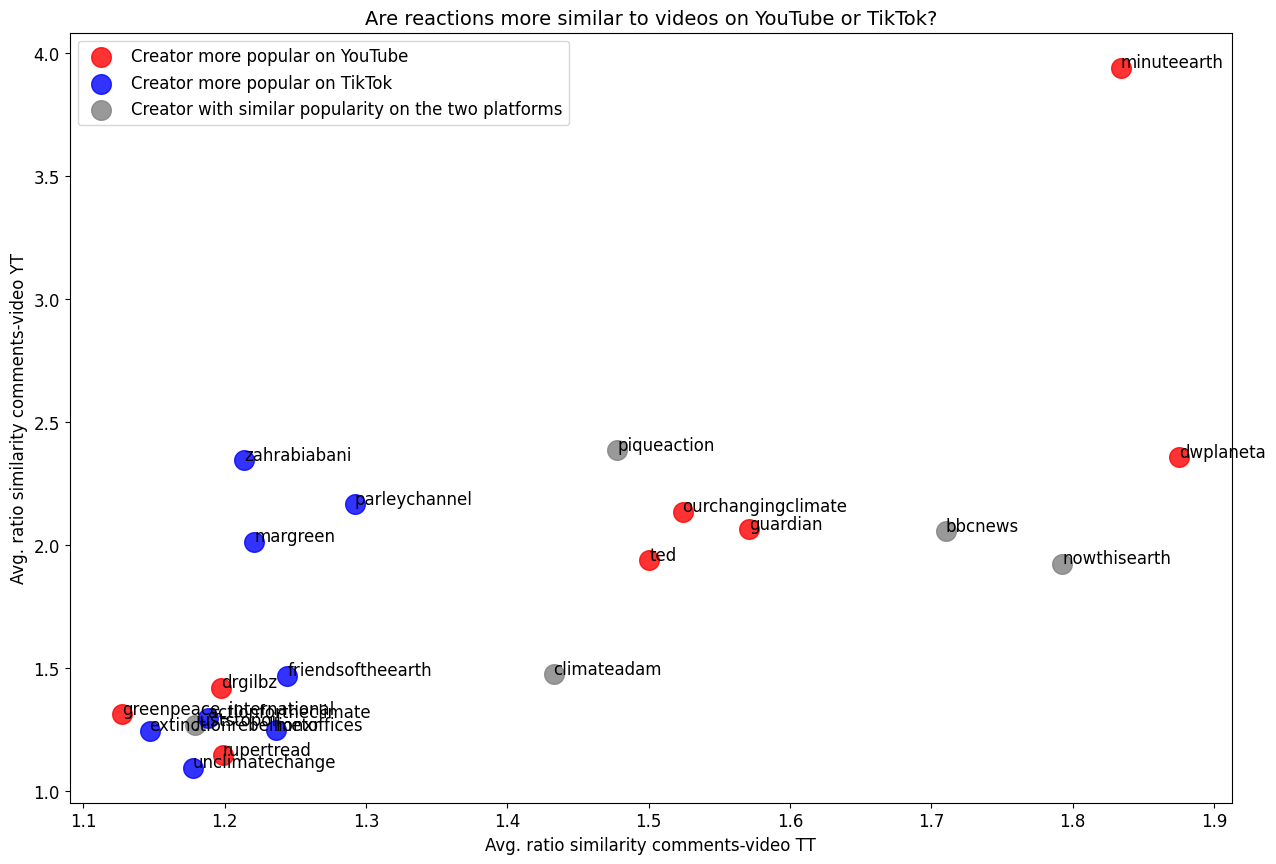

In [194]:
# plot ratio similarities
plt.figure(figsize=(15,10))
# list_types = ["institution", "news", "science_communicator", "activist"]
# list_colors = ["red", "blue", "green", "orange"]
list_types = ["yt", "tt", "similar"]
list_colors = ["red", "blue", "grey"]

for creator in list_creators:
    # open ratios/sim_tt file
    try:
        with open("./ratios/ratios_sim_tt_" + creator + ".pkl", 'rb') as f:
            list_ratios_tt = pickle.load(f)
    except:
        print("No TT file for creator ", creator)
        continue
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + ".pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_tt = np.mean(list_ratios_tt)
    mean_yt = np.mean(list_ratios_yt)

    plt.scatter(mean_tt, mean_yt, c=list_colors[list_types.index(dict_type_creator[creator])], s=200, alpha=0.8)

    plt.annotate(creator, (mean_tt, mean_yt), fontsize=12)

# xticks and yticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.xlabel("Avg. ratio similarity comments-video TT", fontsize=12)
plt.ylabel("Avg. ratio similarity comments-video YT", fontsize=12)
plt.title("Are reactions more similar to videos on YouTube or TikTok?", fontsize=14)

# add symbols legend
plt.scatter([], [], color="red", s=200, label="Creator more popular on YouTube", alpha=0.8)
plt.scatter([], [], color="blue", s=200, label="Creator more popular on TikTok", alpha=0.8)
plt.scatter([], [], color="grey", s=200, label="Creator with similar popularity on the two platforms", alpha=0.8)

plt.legend(loc="upper left", fontsize=12)
plt.show()


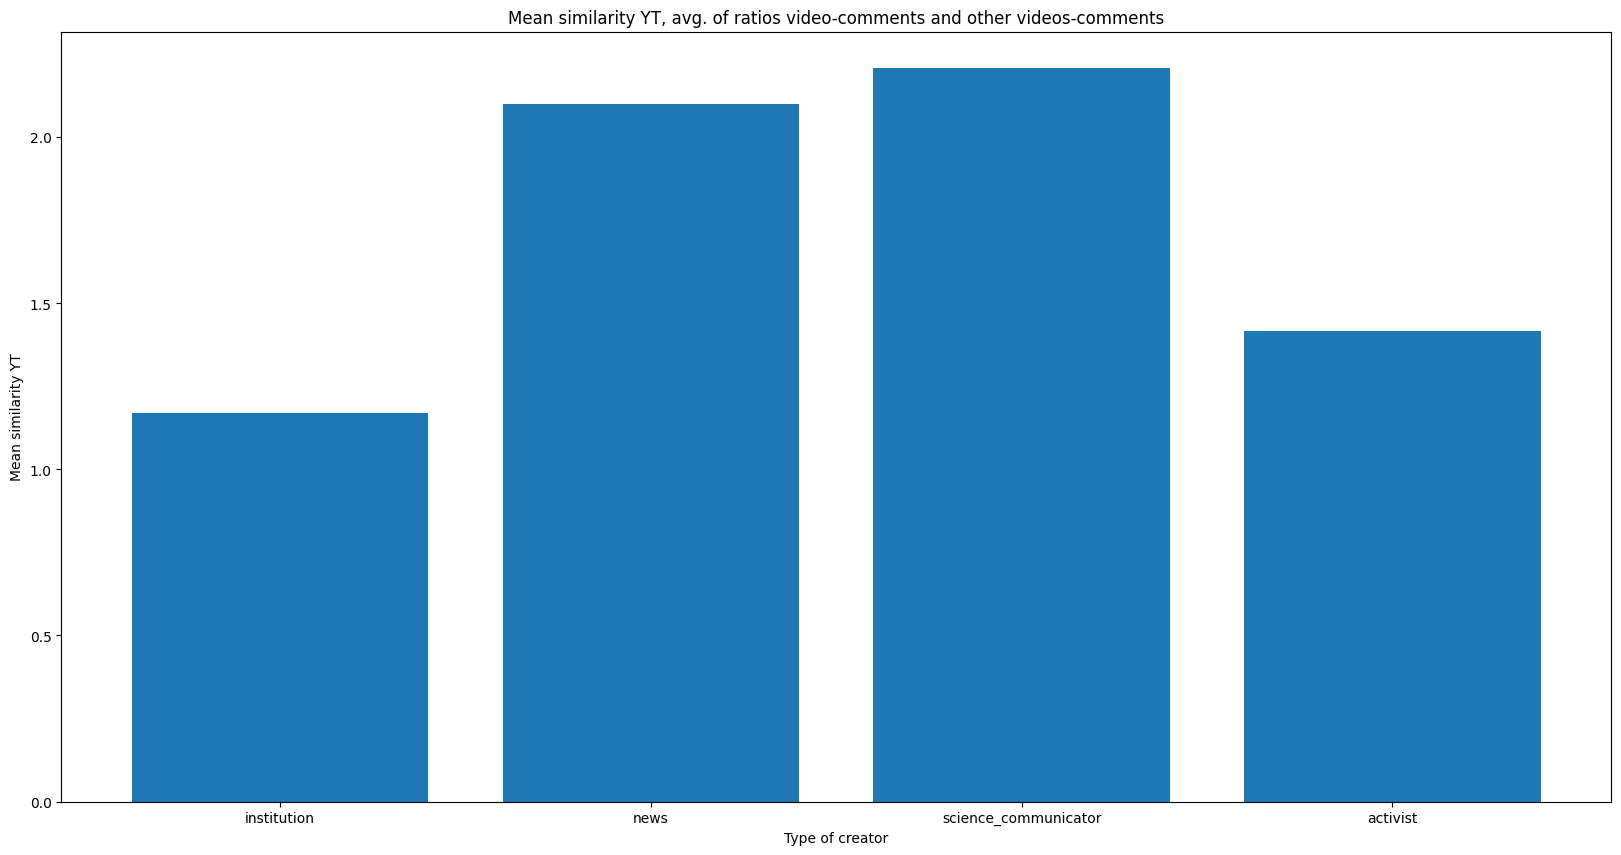

In [54]:
# compute average of ratios for each type of creator
list_ratios_institution = []
list_ratios_news = []
list_ratios_science_communicator = []
list_ratios_activist = []

for creator in list_creators:
    # open ratios/sim_yt file
    with open("./ratios/ratios_sim_yt_" + creator + ".pkl", 'rb') as f:
        list_ratios_yt = pickle.load(f)

    mean_yt = np.mean(list_ratios_yt)

    if dict_type_creator[creator] == "institution":
        list_ratios_institution.append(mean_yt)
    elif dict_type_creator[creator] == "news":
        list_ratios_news.append(mean_yt)
    elif dict_type_creator[creator] == "science_communicator":
        list_ratios_science_communicator.append(mean_yt)
    elif dict_type_creator[creator] == "activist":
        list_ratios_activist.append(mean_yt)

# average of ratios for each type of creator
mean_ratios_institution = np.mean(list_ratios_institution)
mean_ratios_news = np.mean(list_ratios_news)
mean_ratios_science_communicator = np.mean(list_ratios_science_communicator)
mean_ratios_activist = np.mean(list_ratios_activist)

# plot barplot
plt.figure(figsize=(20,10))
plt.bar(["institution", "news", "science_communicator", "activist"], [mean_ratios_institution, mean_ratios_news, mean_ratios_science_communicator, mean_ratios_activist])
plt.xlabel("Type of creator")
plt.ylabel("Mean similarity YT")
plt.title("Mean similarity YT, avg. of ratios video-comments and other videos-comments")
plt.show()

No TT file for creator  actionfortheclimate
No TT file for creator  piqueaction
No TT file for creator  margreen
No TT file for creator  nowthisearth


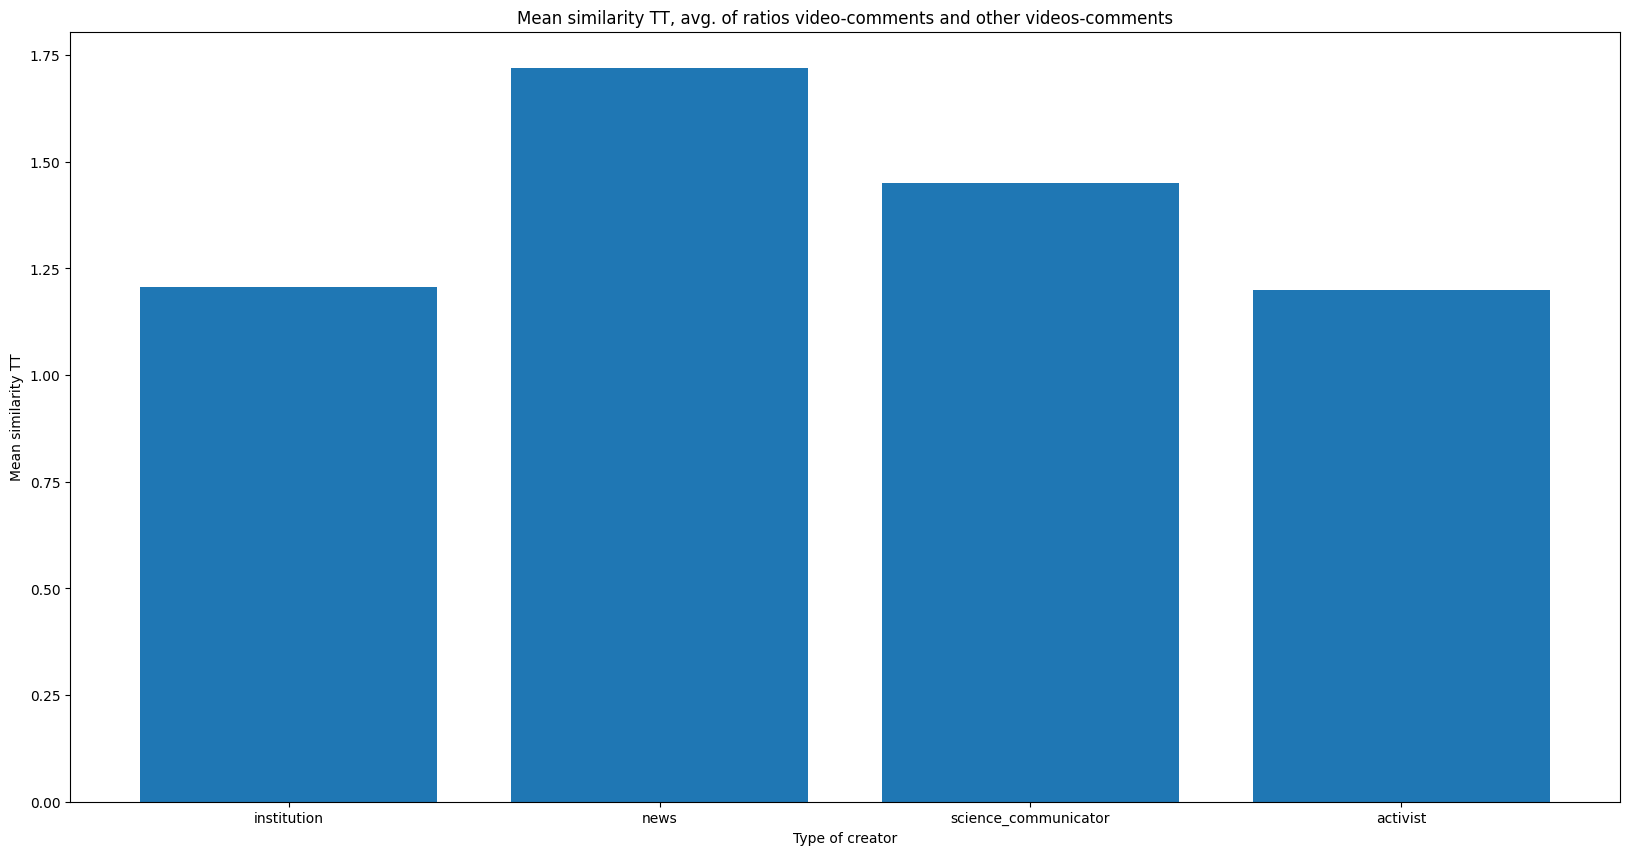

In [55]:
# compute average of ratios for each type of creator
list_ratios_institution = []
list_ratios_news = []
list_ratios_science_communicator = []
list_ratios_activist = []

for creator in list_creators:
    # open ratios/sim_yt file
    try: 
        with open("./ratios/ratios_sim_tt_" + creator + ".pkl", 'rb') as f:
            list_ratios_tt = pickle.load(f)
    except:
        print("No TT file for creator ", creator)
        continue

    mean_tt = np.mean(list_ratios_tt)

    if dict_type_creator[creator] == "institution":
        list_ratios_institution.append(mean_tt)
    elif dict_type_creator[creator] == "news":
        list_ratios_news.append(mean_tt)
    elif dict_type_creator[creator] == "science_communicator":
        list_ratios_science_communicator.append(mean_tt)
    elif dict_type_creator[creator] == "activist":
        list_ratios_activist.append(mean_tt)

# average of ratios for each type of creator
mean_ratios_institution = np.mean(list_ratios_institution)
mean_ratios_news = np.mean(list_ratios_news)
mean_ratios_science_communicator = np.mean(list_ratios_science_communicator)
mean_ratios_activist = np.mean(list_ratios_activist)

# plot barplot
plt.figure(figsize=(20,10))
plt.bar(["institution", "news", "science_communicator", "activist"], [mean_ratios_institution, mean_ratios_news, mean_ratios_science_communicator, mean_ratios_activist])
plt.xlabel("Type of creator")
plt.ylabel("Mean similarity TT")
plt.title("Mean similarity TT, avg. of ratios video-comments and other videos-comments")
plt.show()